In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("TSF alternate.csv",parse_dates=True,squeeze=True,index_col=0)

In [3]:
df.dtypes

dtype('int64')

In [4]:
print(df.head())
print(df.tail())

YearMonth
1980-01-01     85
1980-02-01     89
1980-03-01    109
1980-04-01     95
1980-05-01     91
Name: Shoe_Sales, dtype: int64
YearMonth
1995-03-01    188
1995-04-01    195
1995-05-01    189
1995-06-01    220
1995-07-01    274
Name: Shoe_Sales, dtype: int64


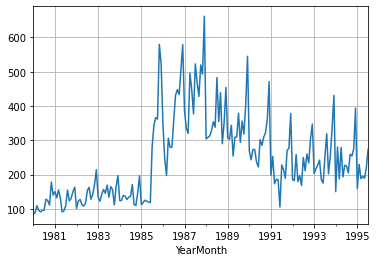

In [5]:
df.plot();
plt.grid()

In [6]:
df = pd.read_csv("TSF alternate.csv")

In [7]:
df.head()

,YearMonth,Shoe_Sales
0,1980-01,85
1,1980-02,89
2,1980-03,109
3,1980-04,95
4,1980-05,91


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   YearMonth   187 non-null    object
 1   Shoe_Sales  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


In [9]:
df.dtypes

YearMonth     object
Shoe_Sales     int64
dtype: object

In [10]:
df = pd.read_csv('TSF alternate.csv', parse_dates = ['YearMonth'])
#We are providing inputs to tell pandas that we are trying to work with time series

In [11]:
df.dtypes

YearMonth     datetime64[ns]
Shoe_Sales             int64
dtype: object

In [12]:
df.isna().sum()

YearMonth     0
Shoe_Sales    0
dtype: int64

In [13]:
df.isnull().sum()

YearMonth     0
Shoe_Sales    0
dtype: int64

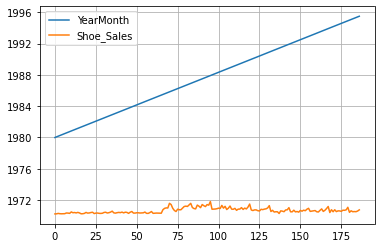

In [14]:
df.plot();
plt.grid()

In [15]:
date = pd.date_range(start='1980-01-01', end='1995-08-01', freq='M')

In [16]:
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [17]:
df['Time_Stamp'] = pd.DataFrame(date,columns=['YearMonth'])
df.head()

,YearMonth,Shoe_Sales,Time_Stamp
0,1980-01-01,85,1980-01-31
1,1980-02-01,89,1980-02-29
2,1980-03-01,109,1980-03-31
3,1980-04-01,95,1980-04-30
4,1980-05-01,91,1980-05-31


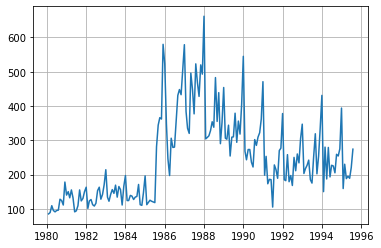

In [18]:
plt.plot(df['Time_Stamp'],df['Shoe_Sales']);
plt.grid()

In [19]:
df['Time_Stamp'] = pd.to_datetime(df['Time_Stamp'])

In [20]:
df = df.set_index('Time_Stamp')
df.drop(['YearMonth'], axis=1, inplace=True)
df.head()

,Shoe_Sales
Time_Stamp,
1980-01-31,85
1980-02-29,89
1980-03-31,109
1980-04-30,95
1980-05-31,91


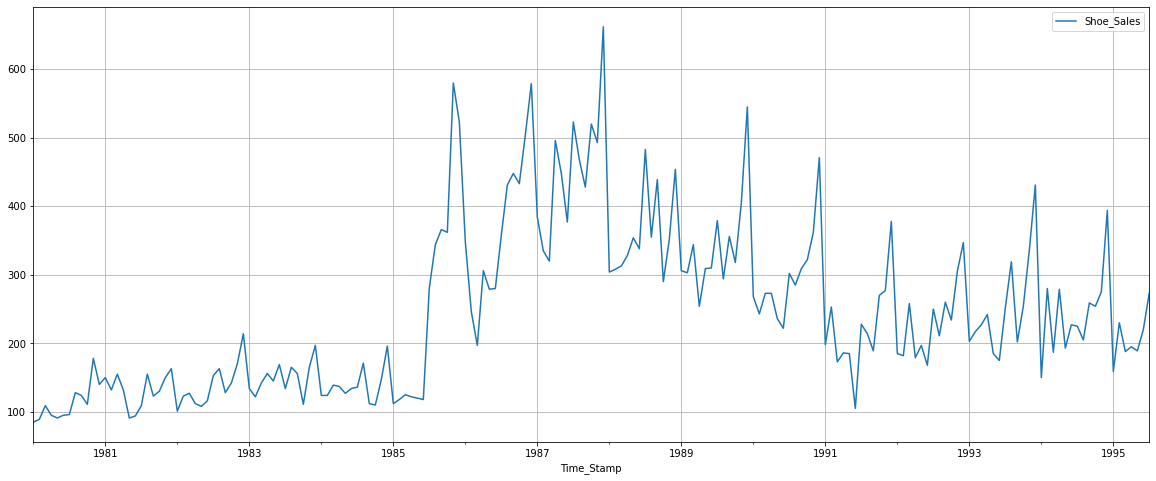

In [21]:
df.plot(figsize=(20,8))
plt.grid();

In [22]:
round(df.describe(),3)

,Shoe_Sales
count,187.000
mean,245.636
std,121.391
min,85.000
25%,143.500
50%,220.000
75%,315.500
max,662.000


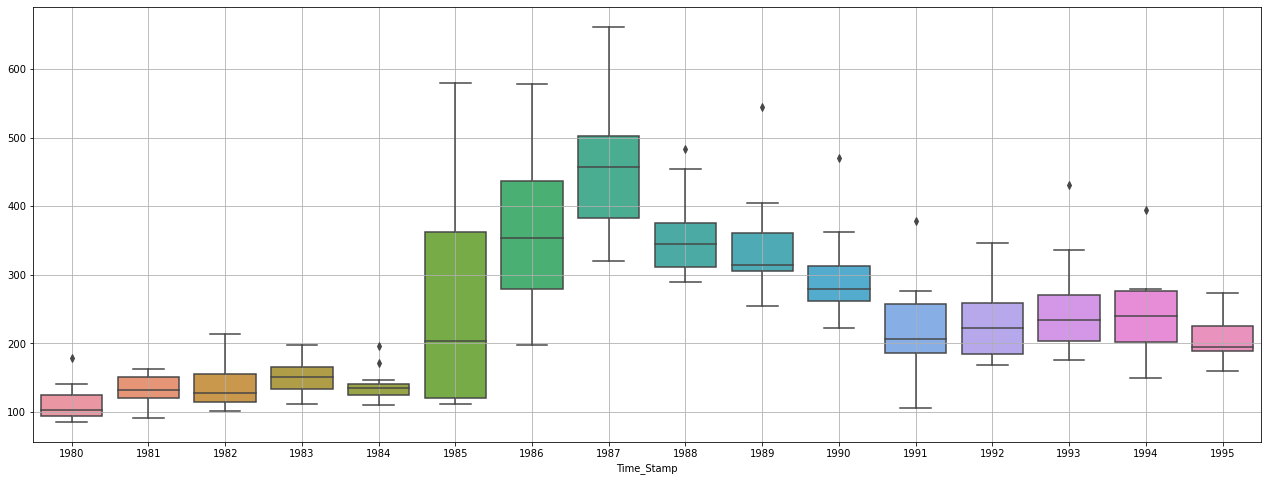

In [23]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.year,y = df.values[:,0],ax=ax)
plt.grid();

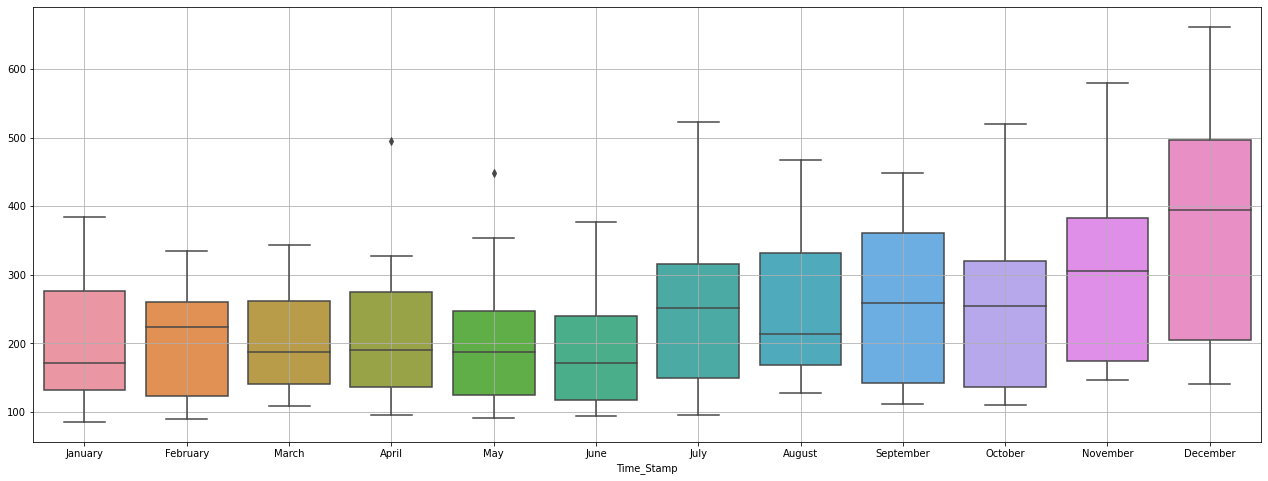

In [24]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(),y = df.values[:,0],ax=ax)
plt.grid();

In [25]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Shoe_Sales', columns = df.index.month_name(), index = df.index.year)
monthly_sales_across_years

Time_Stamp,April,August,December,February,January,July,June,March,May,November,October,September
Time_Stamp,,,,,,,,,,,,
1980,95.0,128.0,140.0,89.0,85.0,96.0,95.0,109.0,91.0,178.0,111.0,124.0
1981,132.0,155.0,163.0,132.0,150.0,109.0,94.0,155.0,91.0,150.0,130.0,123.0
1982,112.0,163.0,214.0,123.0,101.0,153.0,116.0,127.0,108.0,170.0,142.0,128.0
1983,156.0,165.0,197.0,122.0,134.0,134.0,169.0,142.0,145.0,165.0,111.0,156.0
1984,137.0,171.0,196.0,124.0,124.0,136.0,134.0,139.0,127.0,147.0,110.0,112.0
1985,122.0,344.0,523.0,118.0,112.0,281.0,118.0,125.0,120.0,580.0,362.0,366.0
1986,306.0,431.0,579.0,246.0,348.0,358.0,280.0,197.0,279.0,504.0,433.0,448.0
1987,496.0,468.0,662.0,335.0,384.0,523.0,377.0,320.0,448.0,493.0,520.0,428.0
1988,328.0,355.0,454.0,308.0,304.0,483.0,338.0,313.0,354.0,352.0,290.0,439.0


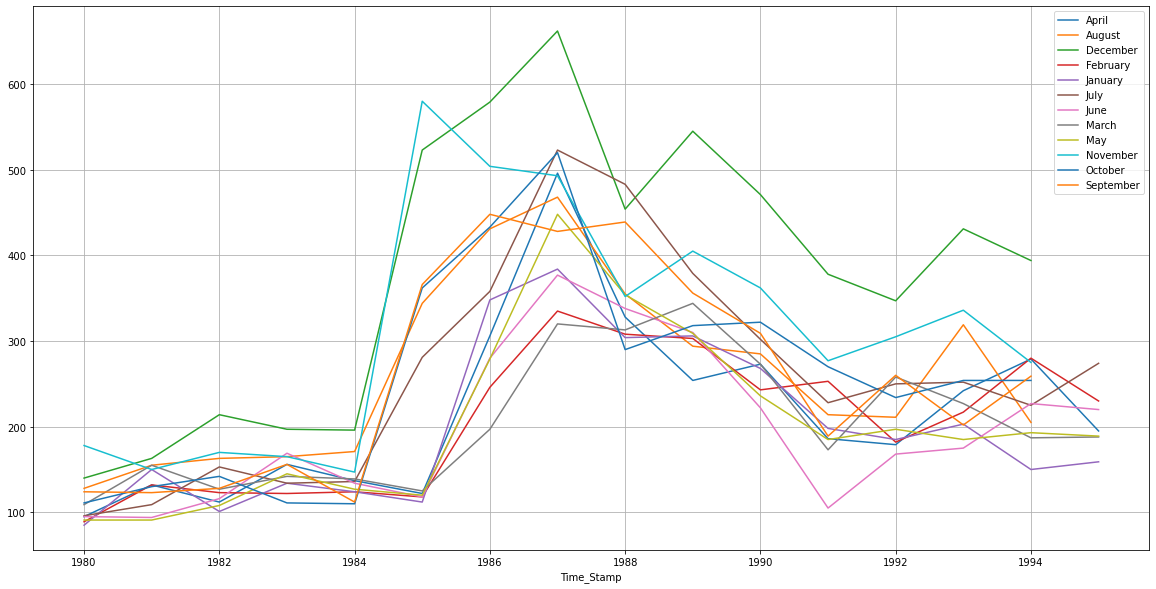

In [26]:
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

In [27]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

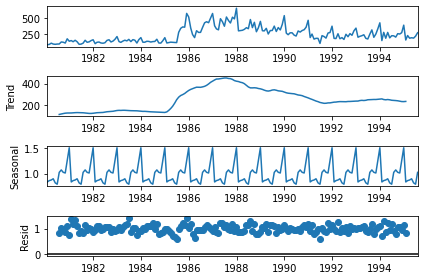

In [28]:
decomposition = seasonal_decompose(df,model='multiplicative')
decomposition.plot();

In [29]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    114.458333
1980-08-31    118.958333
1980-09-30    122.666667
1980-10-31    126.125000
1980-11-30    127.666667
1980-12-31    127.625000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.840405
1980-02-29    0.866682
1980-03-31    0.878675
1980-04-30    0.901826
1980-05-31    0.823141
1980-06-30    0.797254
1980-07-31    1.025527
1980-08-31    1.072445
1980-09-30    1.026307
1980-10-31    1.013557
1980-11-30    1.254223
1980-12-31    1.499958
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.817856
1980-08-31    1.003322
1980-09-30    0.984958
1980-10-31    0.868308
1980-11-30    1.111649
1980-12-31    0.731330
Name: resid, dtype:

In [30]:
# Additive model decompositon

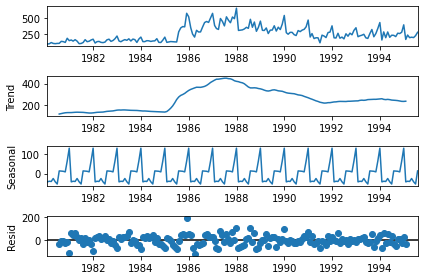

In [31]:
decomposition = seasonal_decompose(df,model='additive')
decomposition.plot();

In [32]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    114.458333
1980-08-31    118.958333
1980-09-30    122.666667
1980-10-31    126.125000
1980-11-30    127.666667
1980-12-31    127.625000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    -42.175463
1980-02-29    -39.062566
1980-03-31    -40.122090
1980-04-30    -25.092328
1980-05-31    -41.878042
1980-06-30    -53.208399
1980-07-31     13.741204
1980-08-31     13.077315
1980-09-30     11.866204
1980-10-31      8.835648
1980-11-30     64.152315
1980-12-31    129.866204
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    -32.199537
1980-08-31     -4.035648
1980-09-30    -10.532870
1980-10-31    -23.960648
1980-11-30    -13.818

In [33]:
train             = df[df.index<'1991'] 
test              = df[df.index>='1991']

In [34]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [35]:
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

First few rows of Training Data 
             Shoe_Sales
Time_Stamp            
1980-01-31          85
1980-02-29          89
1980-03-31         109
1980-04-30          95
1980-05-31          91 

Last few rows of Training Data 
             Shoe_Sales
Time_Stamp            
1990-08-31         285
1990-09-30         309
1990-10-31         322
1990-11-30         362
1990-12-31         471 

First few rows of Test Data 
             Shoe_Sales
Time_Stamp            
1991-01-31         198
1991-02-28         253
1991-03-31         173
1991-04-30         186
1991-05-31         185 

Last few rows of Test Data 
             Shoe_Sales
Time_Stamp            
1995-03-31         188
1995-04-30         195
1995-05-31         189
1995-06-30         220
1995-07-31         274 



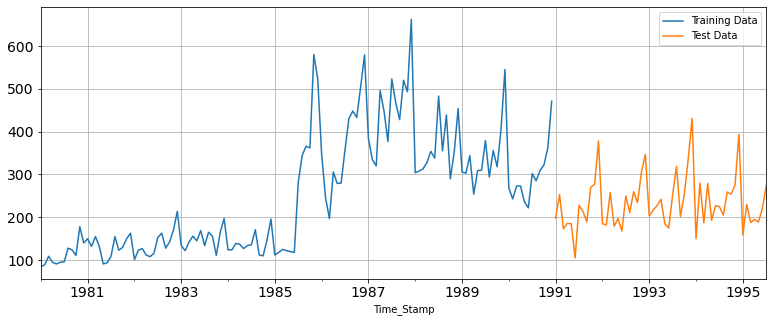

In [36]:
train['Shoe_Sales'].plot(figsize=(13,5), fontsize=14)
test['Shoe_Sales'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

In [37]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [38]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [39]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Shoe_Sales  time
Time_Stamp                  
1980-01-31          85     1
1980-02-29          89     2
1980-03-31         109     3
1980-04-30          95     4
1980-05-31          91     5 

Last few rows of Training Data 
             Shoe_Sales  time
Time_Stamp                  
1990-08-31         285   128
1990-09-30         309   129
1990-10-31         322   130
1990-11-30         362   131
1990-12-31         471   132 

First few rows of Test Data 
             Shoe_Sales  time
Time_Stamp                  
1991-01-31         198   133
1991-02-28         253   134
1991-03-31         173   135
1991-04-30         186   136
1991-05-31         185   137 

Last few rows of Test Data 
             Shoe_Sales  time
Time_Stamp                  
1995-03-31         188   183
1995-04-30         195   184
1995-05-31         189   185
1995-06-30         220   186
1995-07-31         274   187 



In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
lr = LinearRegression()

In [42]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Shoe_Sales'].values)

LinearRegression()

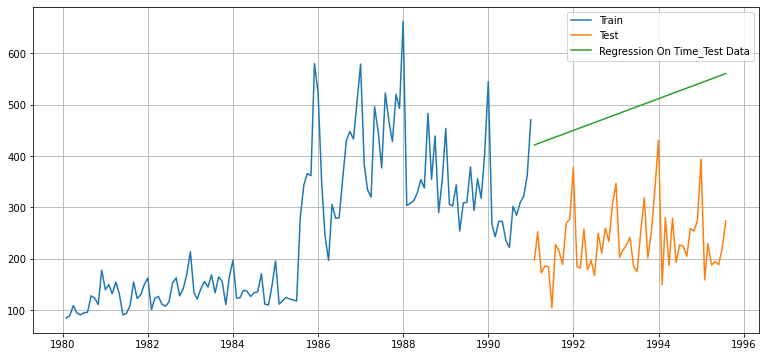

In [43]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Shoe_Sales'], label='Train')
plt.plot(test['Shoe_Sales'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [44]:
from sklearn import metrics

In [45]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Shoe_Sales'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 266.276


In [46]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,266.276472


In [47]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [48]:
NaiveModel_test['naive'] = np.asarray(train['Shoe_Sales'])[len(np.asarray(train['Shoe_Sales']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    471
1991-02-28    471
1991-03-31    471
1991-04-30    471
1991-05-31    471
Name: naive, dtype: int64

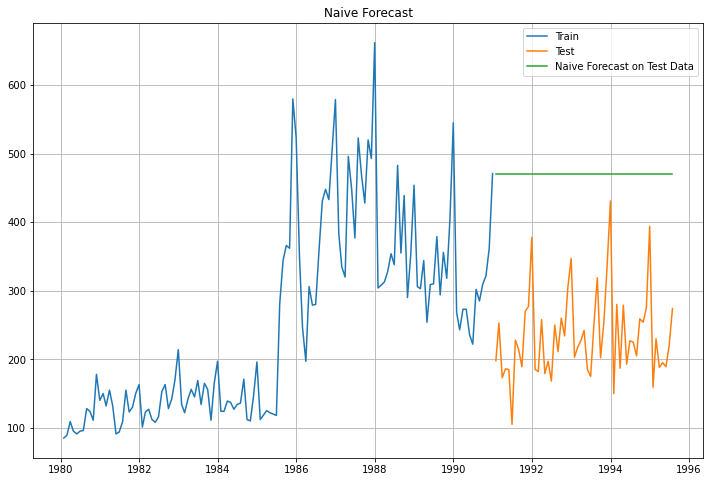

In [49]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Shoe_Sales'], label='Train')
plt.plot(test['Shoe_Sales'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [50]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test['Shoe_Sales'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 245.121


In [51]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,266.276472
NaiveModel,245.121306


In [52]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [53]:
SimpleAverage_test['mean_forecast'] = train['Shoe_Sales'].mean()
SimpleAverage_test.head()

,Shoe_Sales,mean_forecast
Time_Stamp,,
1991-01-31,198,250.575758
1991-02-28,253,250.575758
1991-03-31,173,250.575758
1991-04-30,186,250.575758
1991-05-31,185,250.575758


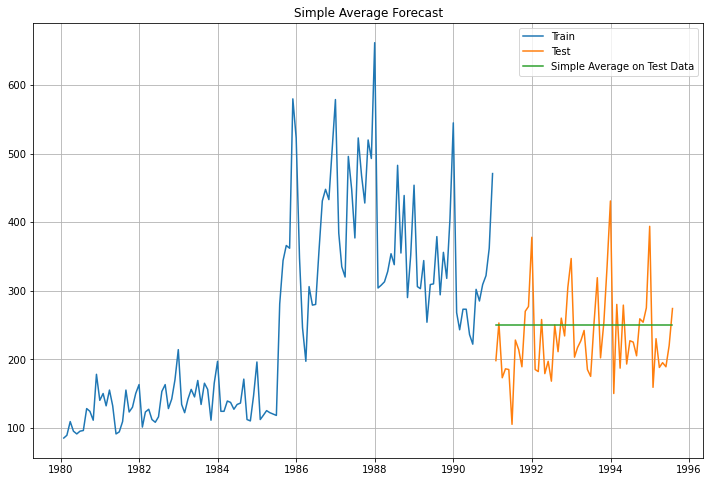

In [54]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Shoe_Sales'], label='Train')
plt.plot(SimpleAverage_test['Shoe_Sales'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [55]:
rmse_model3_test = metrics.mean_squared_error(test['Shoe_Sales'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 266.276


In [56]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,266.276472
NaiveModel,245.121306
SimpleAverageModel,266.276472


In [57]:
MovingAverage_train = train.copy()
MovingAverage_test = test.copy()

In [58]:
MovingAverage_train['Trailing_2'] = MovingAverage_train['Shoe_Sales'].rolling(2).mean()
MovingAverage_train['Trailing_4'] = MovingAverage_train['Shoe_Sales'].rolling(4).mean()
MovingAverage_train['Trailing_6'] = MovingAverage_train['Shoe_Sales'].rolling(6).mean()
MovingAverage_train['Trailing_9'] = MovingAverage_train['Shoe_Sales'].rolling(9).mean()

MovingAverage_train.tail()

,Shoe_Sales,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_Stamp,,,,,
1990-08-31,285,293.5,261.25,265.166667,294.111111
1990-09-30,309,297.0,279.50,271.166667,267.888889
1990-10-31,322,315.5,304.50,279.333333,273.888889
1990-11-30,362,342.0,319.50,300.333333,287.111111
1990-12-31,471,416.5,366.00,341.833333,309.111111


In [59]:
# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:.2f}'.format   

MovingAverage_train['Trailing_2'] = MovingAverage_train['Shoe_Sales'].rolling(2).mean()
MovingAverage_train['Trailing_4'] = MovingAverage_train['Shoe_Sales'].rolling(4).mean()
MovingAverage_train['Trailing_6'] = MovingAverage_train['Shoe_Sales'].rolling(6).mean()
MovingAverage_train['Trailing_9'] = MovingAverage_train['Shoe_Sales'].rolling(9).mean()

MovingAverage_train.tail()


,Shoe_Sales,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_Stamp,,,,,
1990-08-31,285,293.50,261.25,265.17,294.11
1990-09-30,309,297.00,279.50,271.17,267.89
1990-10-31,322,315.50,304.50,279.33,273.89
1990-11-30,362,342.00,319.50,300.33,287.11
1990-12-31,471,416.50,366.00,341.83,309.11


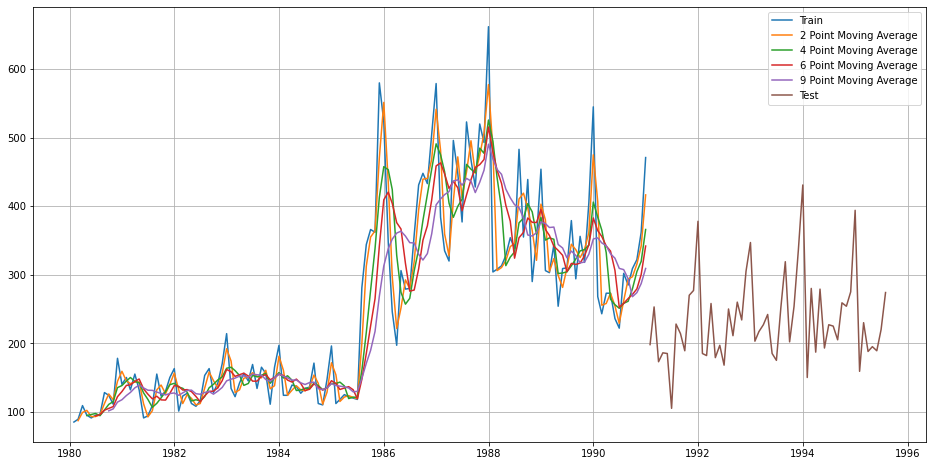

In [60]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage_train['Shoe_Sales'], label='Train')
plt.plot(MovingAverage_train['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage_train['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage_train['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage_train['Trailing_9'],label = '9 Point Moving Average')
plt.plot(MovingAverage_test['Shoe_Sales'], label='Test')

plt.legend(loc = 'best')
plt.grid();

In [61]:
MovingAverage_test['pred_Trailing_2'] = 121.00
MovingAverage_test['pred_Trailing_4'] = 97.50
MovingAverage_test['pred_Trailing_6'] = 89.67
MovingAverage_test['pred_Trailing_9'] = 84.44

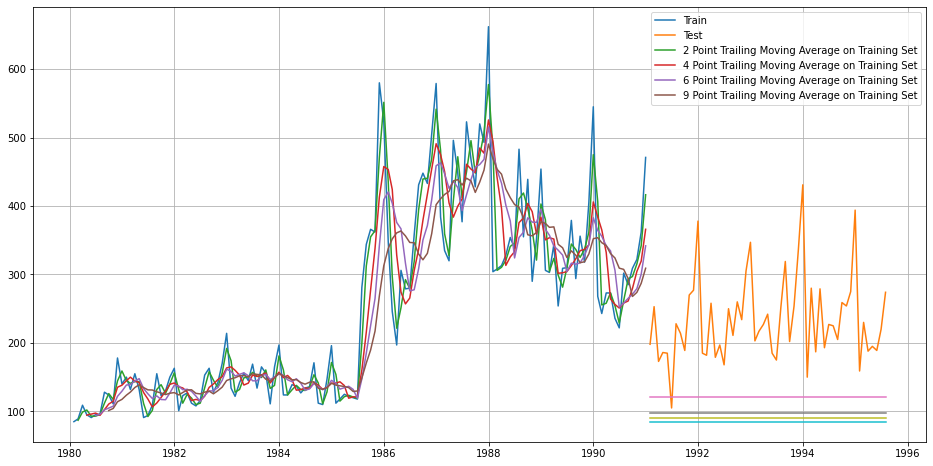

In [62]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage_train['Shoe_Sales'], label='Train')
plt.plot(MovingAverage_test['Shoe_Sales'], label='Test')

plt.plot(MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(MovingAverage_test['pred_Trailing_2'])
plt.plot(MovingAverage_test['pred_Trailing_4'])
plt.plot(MovingAverage_test['pred_Trailing_6'])
plt.plot(MovingAverage_test['pred_Trailing_9'])

plt.legend(loc = 'best')
plt.grid();

In [63]:
from sklearn import metrics

In [64]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Shoe_Sales'],MovingAverage_test['pred_Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Shoe_Sales'],MovingAverage_test['pred_Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Shoe_Sales'],MovingAverage_test['pred_Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Shoe_Sales'],MovingAverage_test['pred_Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 128.576
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 149.615
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 156.781
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 161.601 


In [65]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
RegressionOnTime,266.28
NaiveModel,245.12
SimpleAverageModel,266.28
2pointTrailingMovingAverage,128.58
4pointTrailingMovingAverage,149.62
6pointTrailingMovingAverage,156.78
9pointTrailingMovingAverage,161.60


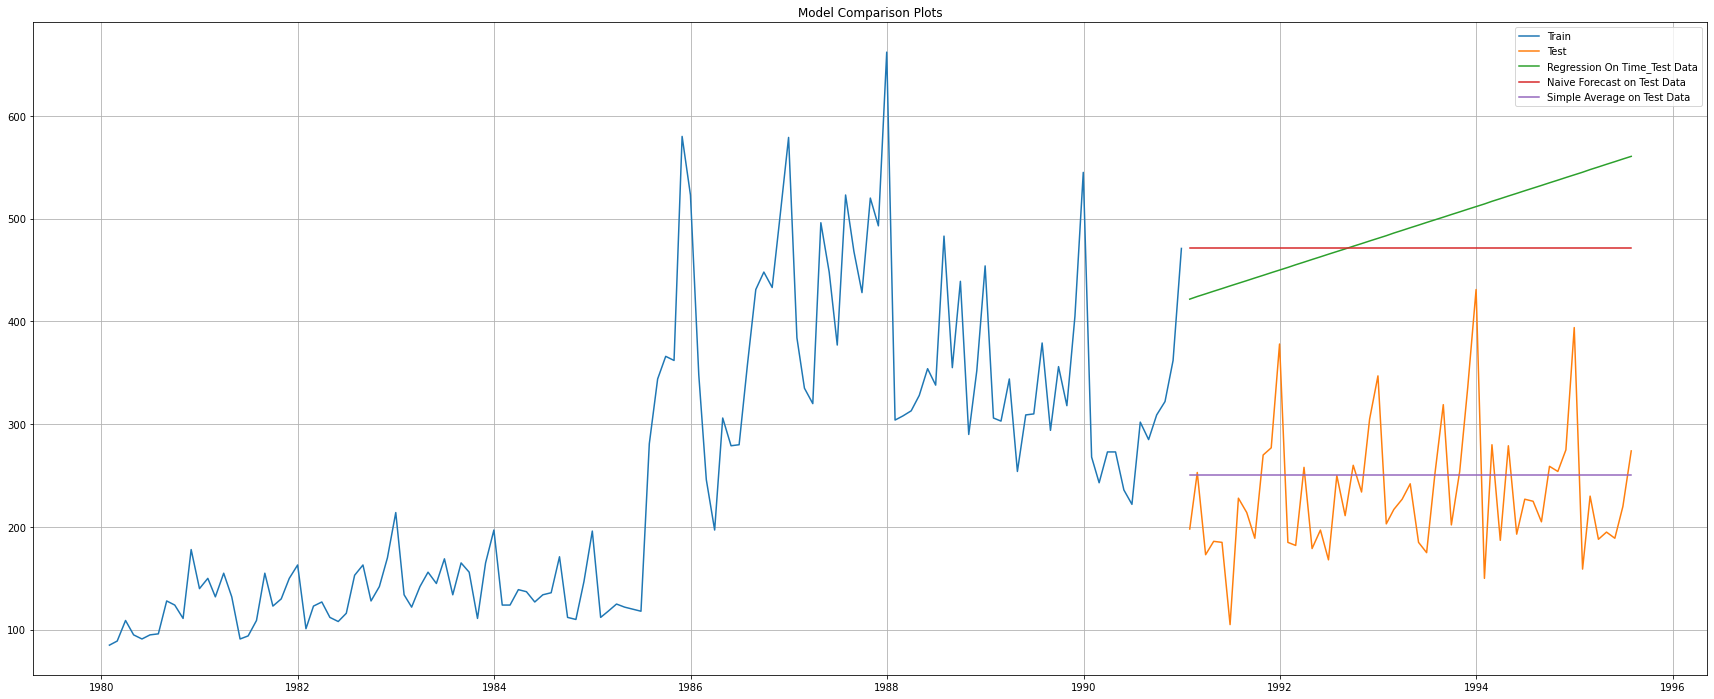

In [66]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Shoe_Sales'], label='Train')
plt.plot(test['Shoe_Sales'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

In [67]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [68]:
SES_train = train.copy()
SES_test = test.copy()

In [69]:
model_SES = SimpleExpSmoothing(SES_train['Shoe_Sales'])

C:\Users\patel\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\patel\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [70]:
model_SES_autofit = model_SES.fit(optimized=True)

In [71]:
model_SES_autofit.params

{'smoothing_level': 0.6050493159152485,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 88.82865380886527,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [72]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,Shoe_Sales,predict
Time_Stamp,,
1991-01-31,198,420.23
1991-02-28,253,420.23
1991-03-31,173,420.23
1991-04-30,186,420.23
1991-05-31,185,420.23


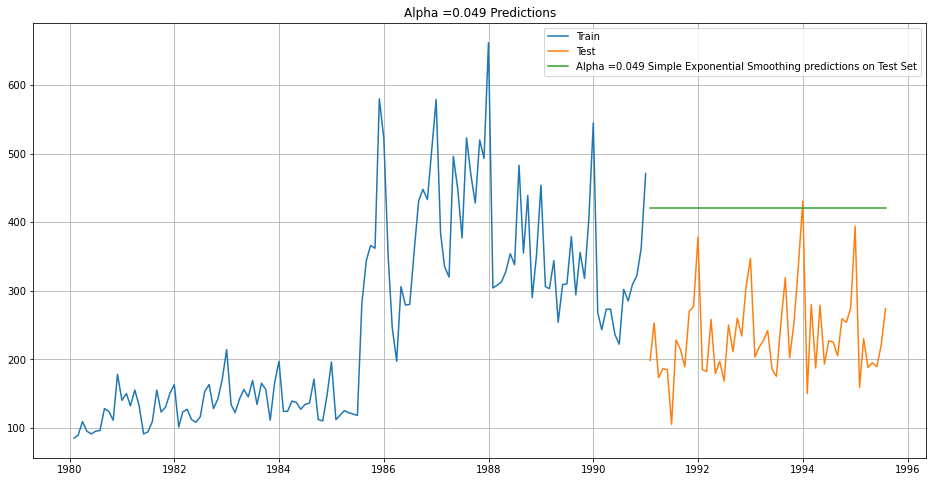

In [73]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Shoe_Sales'], label='Train')
plt.plot(SES_test['Shoe_Sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.049 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.049 Predictions');

In [74]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Shoe_Sales'],SES_test['predict'],squared=False)
print("For Alpha =0.098 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))

For Alpha =0.098 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 196.405


In [75]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.098,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE
RegressionOnTime,266.28
NaiveModel,245.12
SimpleAverageModel,266.28
2pointTrailingMovingAverage,128.58
4pointTrailingMovingAverage,149.62
6pointTrailingMovingAverage,156.78
9pointTrailingMovingAverage,161.60
"Alpha=0.098,SimpleExponentialSmoothing",196.40


In [76]:
DES_train = train.copy()
DES_test = test.copy()

In [77]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.5948061323729839, 'smoothing_trend': 0.000279646480657923, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 82.93815017865691, 'initial_trend': 2.5254544148321547, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\patel\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [78]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict

1991-01-31   422.87
1991-02-28   425.40
1991-03-31   427.92
1991-04-30   430.45
1991-05-31   432.98
1991-06-30   435.50
1991-07-31   438.03
1991-08-31   440.56
1991-09-30   443.08
1991-10-31   445.61
1991-11-30   448.14
1991-12-31   450.66
1992-01-31   453.19
1992-02-29   455.72
1992-03-31   458.24
1992-04-30   460.77
1992-05-31   463.30
1992-06-30   465.82
1992-07-31   468.35
1992-08-31   470.88
1992-09-30   473.40
1992-10-31   475.93
1992-11-30   478.46
1992-12-31   480.98
1993-01-31   483.51
1993-02-28   486.04
1993-03-31   488.56
1993-04-30   491.09
1993-05-31   493.62
1993-06-30   496.14
1993-07-31   498.67
1993-08-31   501.20
1993-09-30   503.72
1993-10-31   506.25
1993-11-30   508.78
1993-12-31   511.30
1994-01-31   513.83
1994-02-28   516.35
1994-03-31   518.88
1994-04-30   521.41
1994-05-31   523.93
1994-06-30   526.46
1994-07-31   528.99
1994-08-31   531.51
1994-09-30   534.04
1994-10-31   536.57
1994-11-30   539.09
1994-12-31   541.62
1995-01-31   544.15
1995-02-28   546.67


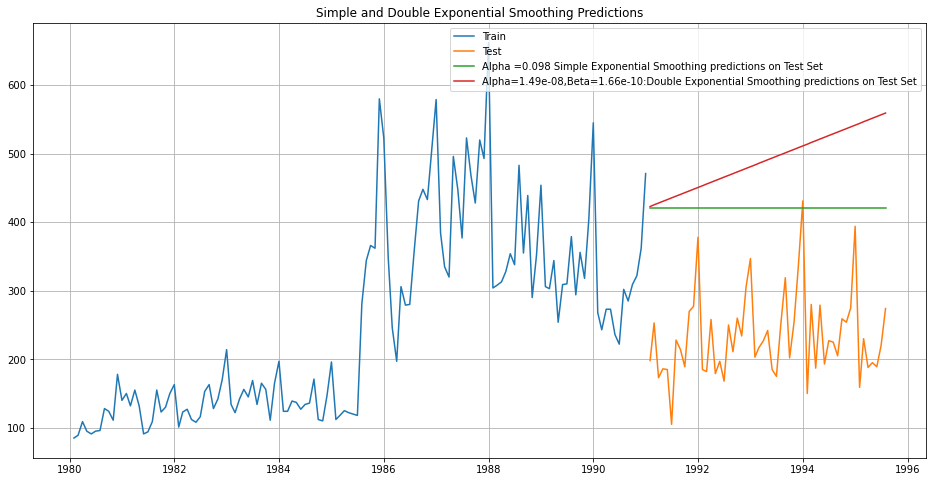

In [79]:
## Plotting the Training data, Test data and the forecasted values
plt.figure(figsize=(16,8))
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.098 Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=1.49e-08,Beta=1.66e-10:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [80]:
print('DES RMSE:', metrics.mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 266.16120808183047


In [81]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [metrics.mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha=1.49e-08,Beta=1.66e-10:DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
RegressionOnTime,266.28
NaiveModel,245.12
SimpleAverageModel,266.28
2pointTrailingMovingAverage,128.58
4pointTrailingMovingAverage,149.62
6pointTrailingMovingAverage,156.78
9pointTrailingMovingAverage,161.60
"Alpha=0.098,SimpleExponentialSmoothing",196.40
"Alpha=1.49e-08,Beta=1.66e-10:DES",266.16


In [82]:
TES_train = train.copy()
TES_test = test.copy()

In [83]:
model_TES = ExponentialSmoothing(TES_train['Shoe_Sales'],trend='additive',seasonal='additive',freq='M')

C:\Users\patel\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [84]:
model_TES_autofit = model_TES.fit()

In [85]:
model_TES_autofit.params

{'smoothing_level': 0.6060714285714286,
 'smoothing_trend': 0.00010000000000000002,
 'smoothing_seasonal': 0.2626190476190476,
 'damping_trend': nan,
 'initial_level': 210.54545454545453,
 'initial_trend': 1.6875000000000002,
 'initial_seasons': array([-125.54545455, -121.54545455, -101.54545455, -115.54545455,
        -119.54545455, -115.54545455, -114.54545455,  -82.54545455,
         -86.54545455,  -99.54545455,  -32.54545455,  -70.54545455]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [86]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

,Shoe_Sales,auto_predict
Time_Stamp,,
1991-01-31,198,226.52
1991-02-28,253,226.18
1991-03-31,173,260.24
1991-04-30,186,283.03
1991-05-31,185,299.46


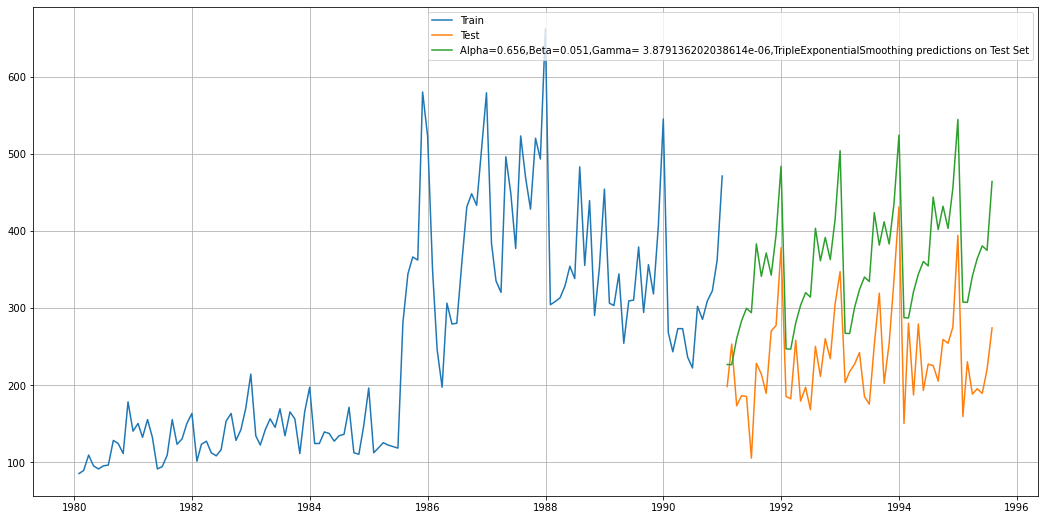

In [87]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Shoe_Sales'], label='Train')
plt.plot(TES_test['Shoe_Sales'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.656,Beta=0.051,Gamma= 3.879136202038614e-06,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [88]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Shoe_Sales'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.08,Beta=0.0005,Gamma= 0.006, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.08,Beta=0.0005,Gamma= 0.006, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 133.704


In [89]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [metrics.mean_squared_error(test.values,TES_test['auto_predict'].values,squared=False)]}
                           ,index=['Alpha=0.656,Beta=0.051,Gamma= 3.879136202038614e-06:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
RegressionOnTime,266.28
NaiveModel,245.12
SimpleAverageModel,266.28
2pointTrailingMovingAverage,128.58
4pointTrailingMovingAverage,149.62
6pointTrailingMovingAverage,156.78
9pointTrailingMovingAverage,161.60
"Alpha=0.098,SimpleExponentialSmoothing",196.40
"Alpha=1.49e-08,Beta=1.66e-10:DES",266.16
"Alpha=0.656,Beta=0.051,Gamma= 3.879136202038614e-06:TES",133.70


### Double Exponential Smoothing and Linear regresssion models has done better when compared to other models when we compare RMSE values of the models

Let us try to tweak some of the parameters of triple model in order to get a better forecast on the test set.

### Holt-Winters - ETS(A, A, M) - Holt Winter's linear method

In [91]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.5711286329525818, 'smoothing_trend': 0.00014781930867568429, 'smoothing_seasonal': 0.20294733706077994, 'damping_trend': nan, 'initial_level': 116.35529208070726, 'initial_trend': 0.11219854465675648, 'initial_seasons': array([1.05679343, 1.01130311, 1.2337466 , 1.40663129, 1.32162715,
       1.07936886, 1.18018187, 1.50183082, 1.72369093, 1.4704132 ,
       1.75485304, 1.92101444]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\patel\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [92]:
# Forecasting using this model for the duration of the test set
TES_predict_am =  model_TES_am.forecast(len(test))
TES_predict_am

1991-01-31   261.34
1991-02-28   243.09
1991-03-31   257.00
1991-04-30   270.20
1991-05-31   267.38
1991-06-30   256.95
1991-07-31   339.59
1991-08-31   315.73
1991-09-30   340.18
1991-10-31   314.98
1991-11-30   376.10
1991-12-31   466.48
1992-01-31   263.15
1992-02-29   244.77
1992-03-31   258.77
1992-04-30   272.06
1992-05-31   269.22
1992-06-30   258.72
1992-07-31   341.93
1992-08-31   317.90
1992-09-30   342.52
1992-10-31   317.15
1992-11-30   378.69
1992-12-31   469.68
1993-01-31   264.96
1993-02-28   246.45
1993-03-31   260.55
1993-04-30   273.93
1993-05-31   271.07
1993-06-30   260.49
1993-07-31   344.27
1993-08-31   320.08
1993-09-30   344.87
1993-10-31   319.31
1993-11-30   381.28
1993-12-31   472.89
1994-01-31   266.77
1994-02-28   248.13
1994-03-31   262.33
1994-04-30   275.80
1994-05-31   272.91
1994-06-30   262.27
1994-07-31   346.61
1994-08-31   322.26
1994-09-30   347.21
1994-10-31   321.48
1994-11-30   383.87
1994-12-31   476.10
1995-01-31   268.58
1995-02-28   249.81


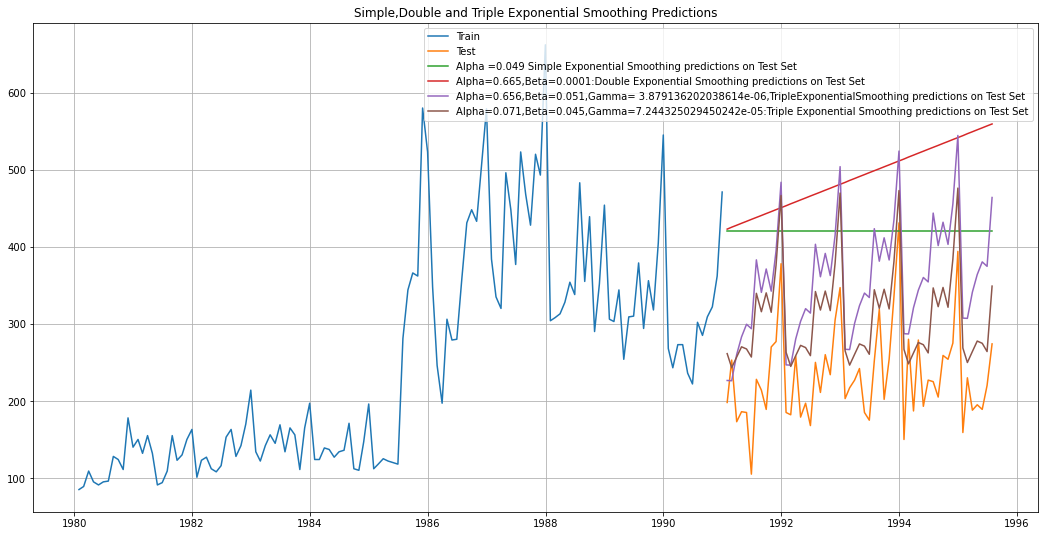

In [93]:
## Plotting the Training data, Test data and the forecasted values
plt.figure(figsize=(18,9))
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.049 Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.665,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_test['auto_predict'], label='Alpha=0.656,Beta=0.051,Gamma= 3.879136202038614e-06,TripleExponentialSmoothing predictions on Test Set')
plt.plot(TES_predict_am, label='Alpha=0.071,Beta=0.045,Gamma=7.244325029450242e-05:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [94]:
print('TES_am RMSE:',metrics.mean_squared_error(test.values,TES_predict_am.values,squared=False))

TES_am RMSE: 83.734048494837


In [95]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [metrics.mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
                           ,index=['Alpha=0.071,Beta=0.045,Gamma=7.244325029450242e-05,Gamma=0:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
RegressionOnTime,266.28
NaiveModel,245.12
SimpleAverageModel,266.28
2pointTrailingMovingAverage,128.58
4pointTrailingMovingAverage,149.62
6pointTrailingMovingAverage,156.78
9pointTrailingMovingAverage,161.60
"Alpha=0.098,SimpleExponentialSmoothing",196.40
"Alpha=1.49e-08,Beta=1.66e-10:DES",266.16
"Alpha=0.656,Beta=0.051,Gamma= 3.879136202038614e-06:TES",133.70


We see that the multiplicative seasonality model has not done that well when compared to the additive seasonality Triple Exponential Smoothing model.

### By looking at the RMSE values we can infer that Triple additive Exponential Smoothing has done better when compared to other models as it shows the lowest RMSE value compared to others.

## Check for stationarity of the whole Time Series data at 𝛼=0.05

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:

𝐻0  : The Time Series has a unit root and is thus non-stationary.
    
𝐻1  : The Time Series does not have a unit root and is thus stationary.
    
We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the  𝛼  value.

In [96]:
from statsmodels.tsa.stattools import adfuller

In [98]:
dftest = adfuller(df,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -1.577
DF test p-value is 0.8014186234536531
Number of lags used 13


#### So we can see that null hpothesis cannot be rejected as p value is greater than 𝛼 value. So say that We see that at 5% significant level the Time Series is non-stationary.

Let us take one level of differencing to see whether the series becomes stationary.

In [99]:
dftest = adfuller(df.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -3.532
DF test p-value is 0.03611703400136064
Number of lags used 12


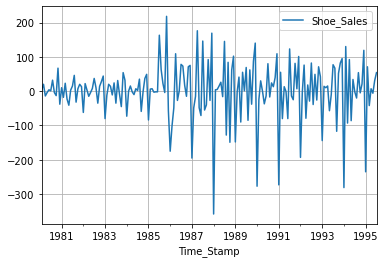

In [100]:
df.diff().dropna().plot(grid=True);

In [101]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [102]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 16,9

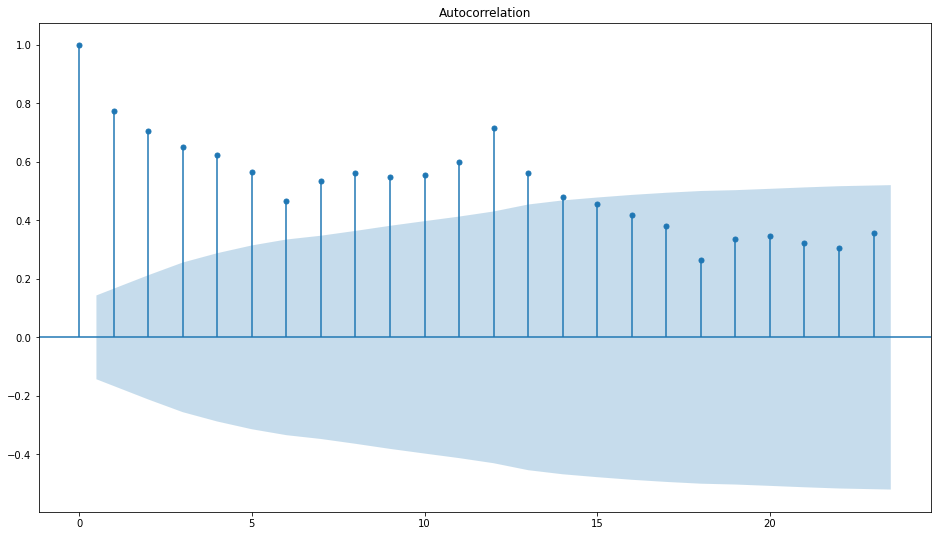

In [103]:
plot_acf(df,alpha=0.05);

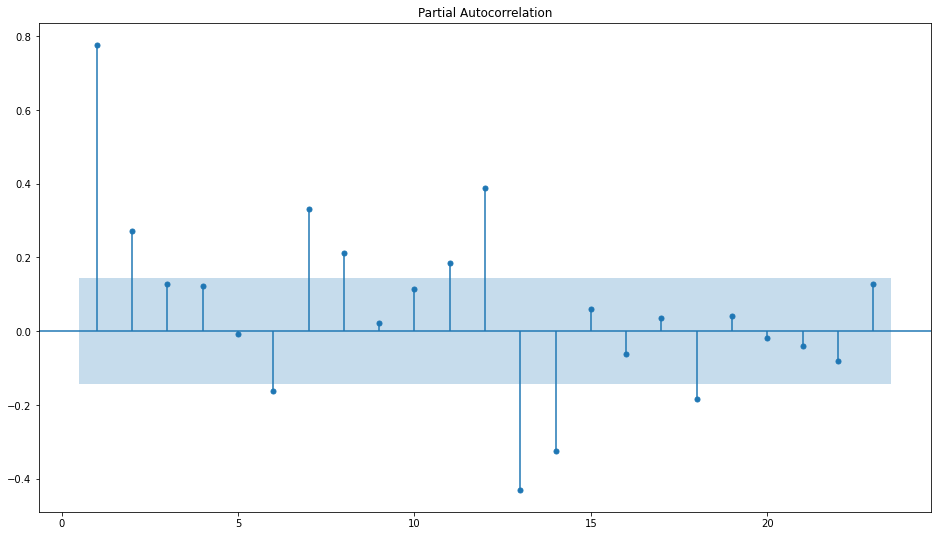

In [104]:
plot_pacf(df,zero=False,alpha=0.05);

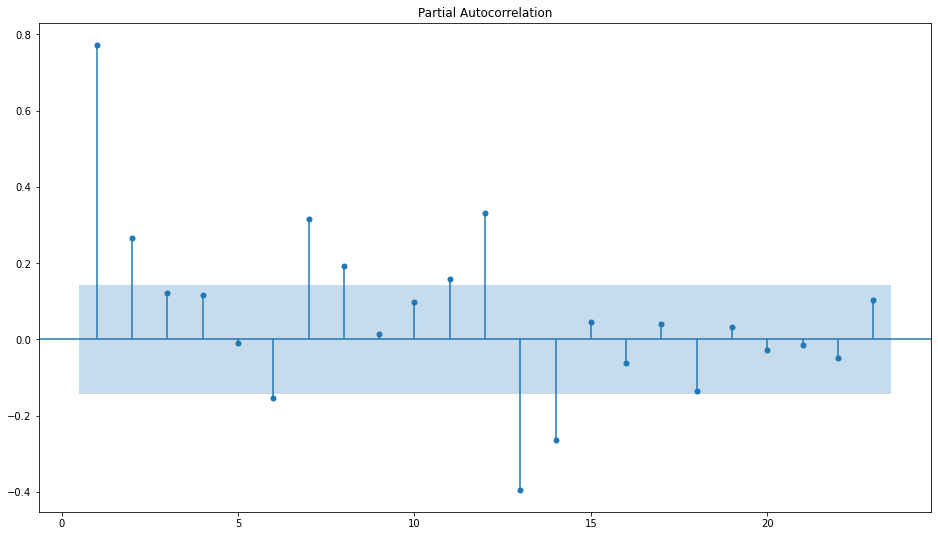

In [105]:
plot_pacf(df,zero=False,alpha=0.05,method='ywmle');

In [106]:
df.index.year.unique()

Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995],
           dtype='int64', name='Time_Stamp')

In [107]:
train             = df[df.index<'1991'] 
test              = df[df.index>='1991']

In [109]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [110]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Shoe_Sales
Time_Stamp,
1980-01-31,85
1980-02-29,89
1980-03-31,109
1980-04-30,95
1980-05-31,91


Last few rows of Training Data


,Shoe_Sales
Time_Stamp,
1990-08-31,285
1990-09-30,309
1990-10-31,322
1990-11-30,362
1990-12-31,471


First few rows of Test Data


,Shoe_Sales
Time_Stamp,
1991-01-31,198
1991-02-28,253
1991-03-31,173
1991-04-30,186
1991-05-31,185


Last few rows of Test Data


,Shoe_Sales
Time_Stamp,
1995-03-31,188
1995-04-30,195
1995-05-31,189
1995-06-30,220
1995-07-31,274


In [111]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


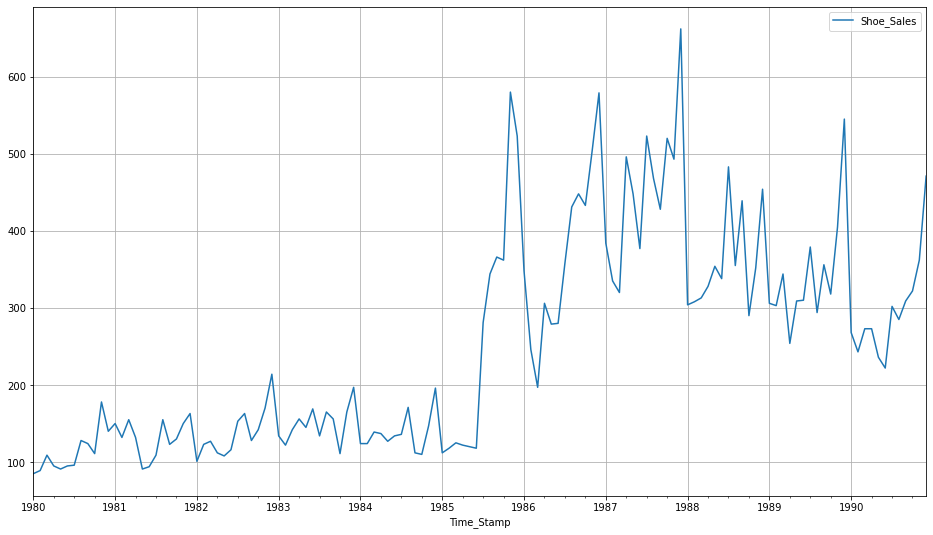

In [112]:
train.plot(grid=True);

In [113]:
dftest = adfuller(train,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -1.749
DF test p-value is 0.7287654522797276
Number of lags used 13


In [114]:
dftest = adfuller(train.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -3.181
DF test p-value is 0.08822589255919633
Number of lags used 13


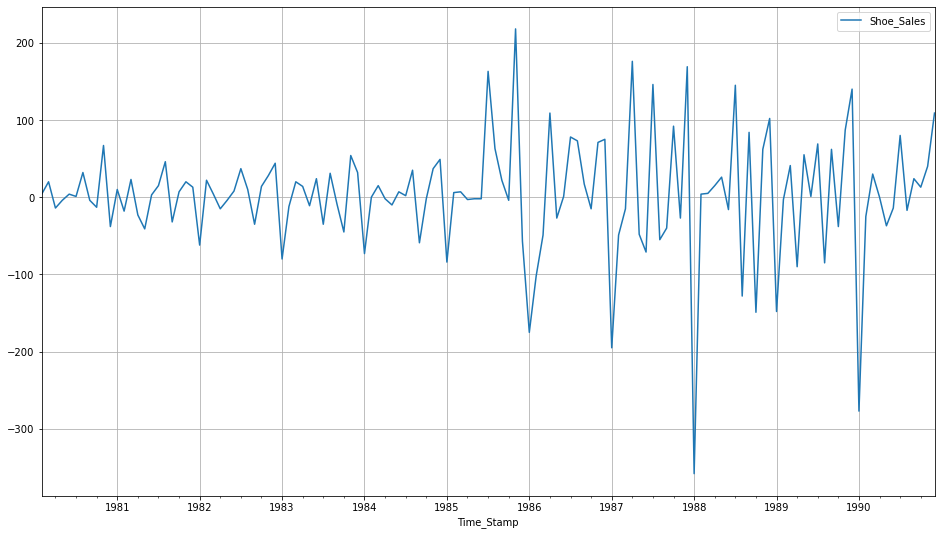

In [115]:
train.diff().dropna().plot(grid=True);

In [116]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-31 to 1990-12-31
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Shoe_Sales  132 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


In [117]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [118]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [119]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['Shoe_Sales'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:1508.2837722095956
ARIMA(0, 1, 1) - AIC:1497.0503224187928
ARIMA(0, 1, 2) - AIC:1494.9646053663362
ARIMA(0, 1, 3) - AIC:1495.148473873865
ARIMA(1, 1, 0) - AIC:1501.64312420119
ARIMA(1, 1, 1) - AIC:1492.4871865078985
ARIMA(1, 1, 2) - AIC:1494.4238594574508
ARIMA(1, 1, 3) - AIC:1496.385878255864
ARIMA(2, 1, 0) - AIC:1498.9504830259416
ARIMA(2, 1, 1) - AIC:1494.4314983035895
ARIMA(2, 1, 2) - AIC:1496.4107391760758


C:\Users\patel\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\patel\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\patel\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 1, 3) - AIC:1480.7940682496865
ARIMA(3, 1, 0) - AIC:1498.9303094227803
ARIMA(3, 1, 1) - AIC:1496.3468641048066
ARIMA(3, 1, 2) - AIC:1495.6558545477549
ARIMA(3, 1, 3) - AIC:1479.6870901573627


C:\Users\patel\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [120]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
15,"(3, 1, 3)",1479.69
11,"(2, 1, 3)",1480.79
5,"(1, 1, 1)",1492.49
6,"(1, 1, 2)",1494.42
9,"(2, 1, 1)",1494.43


In [121]:
auto_ARIMA = ARIMA(train, order=(2,1,3))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\patel\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\patel\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\patel\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:             Shoe_Sales   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -734.397
Date:                Sun, 29 Jan 2023   AIC                           1480.794
Time:                        20:51:17   BIC                           1498.045
Sample:                    01-31-1980   HQIC                          1487.804
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0148      0.029      0.501      0.616      -0.043       0.073
ar.L2         -0.9974      0.017    -59.656      0.000      -1.030      -0.965
ma.L1         -0.3385      0.090     -3.759      0.0

C:\Users\patel\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


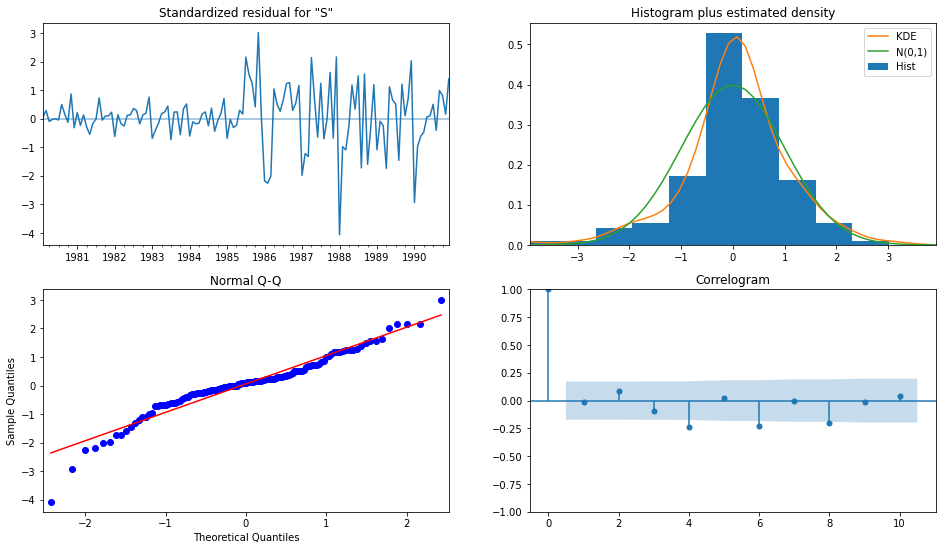

In [122]:
results_auto_ARIMA.plot_diagnostics();

In [123]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [124]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [126]:
rmse = mean_squared_error(test['Shoe_Sales'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Shoe_Sales'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 184.3336657777081 
MAPE: 85.58388250228728


In [127]:
resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(2,1,3)'])

resultsDf


,RMSE,MAPE
"ARIMA(2,1,3)",184.33,85.58


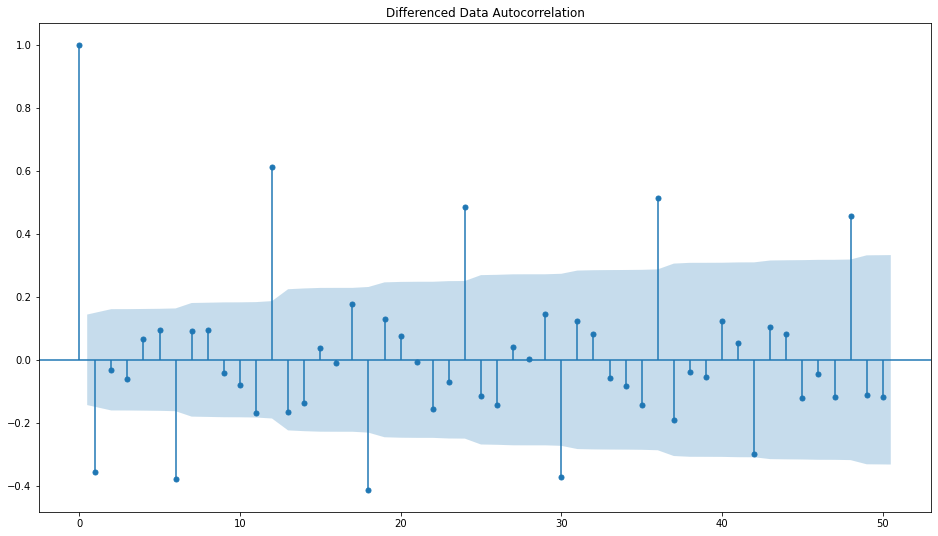

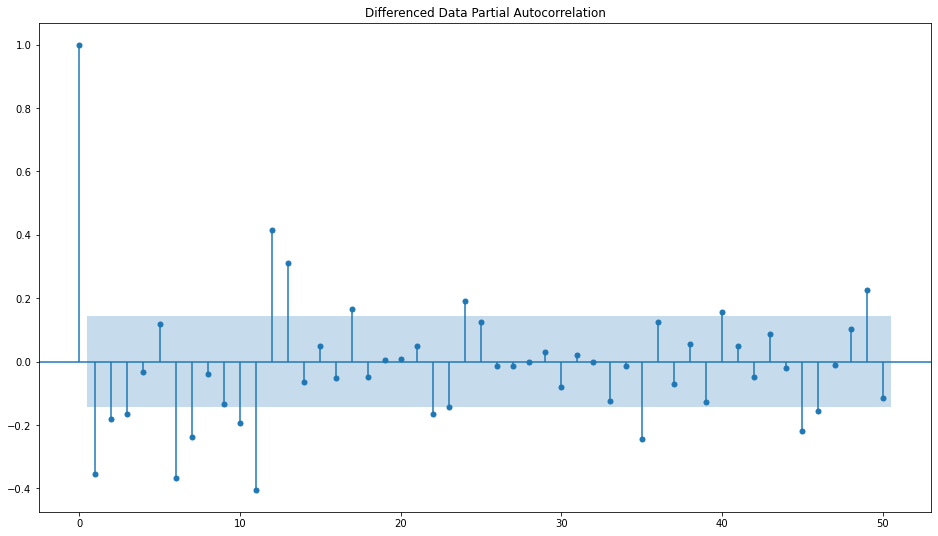

In [129]:
plot_acf(df['Shoe_Sales'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Shoe_Sales'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

Here, we have taken alpha=0.05.

The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 4.

The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 2.

By looking at the above plots, we will take the value of q and p to be 2 and 4 respectively.

In [130]:
manual_ARIMA = ARIMA(train['Shoe_Sales'].astype('float64'), order=(4,1,2),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:             Shoe_Sales   No. Observations:                  132
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -741.766
Date:                Sun, 29 Jan 2023   AIC                           1497.532
Time:                        20:55:03   BIC                           1517.658
Sample:                    01-31-1980   HQIC                          1505.710
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4426      0.148     -2.982      0.003      -0.734      -0.152
ar.L2          0.4391      0.165      2.656      0.008       0.115       0.763
ar.L3          0.0591      0.134      0.441      0.6

C:\Users\patel\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\patel\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\patel\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


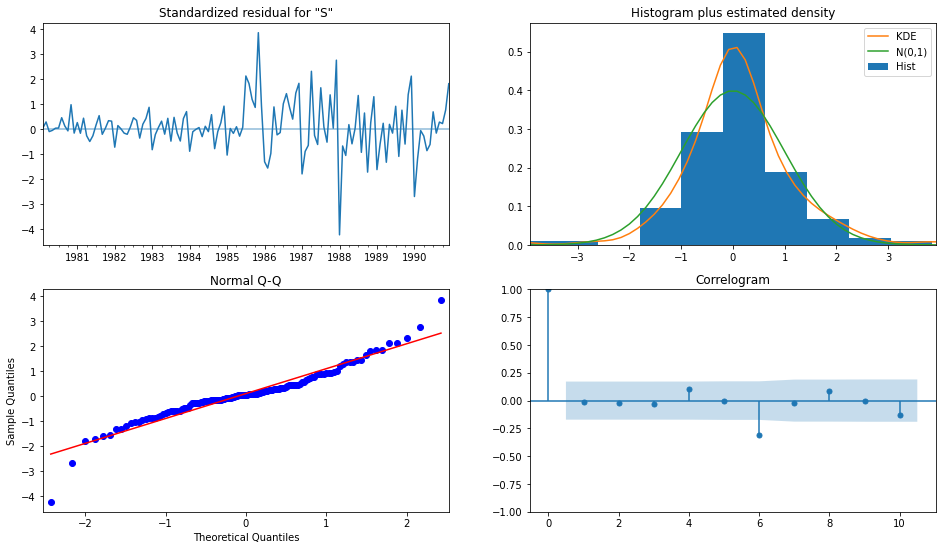

In [131]:
results_manual_ARIMA.plot_diagnostics();


In [132]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [134]:
rmse = mean_squared_error(test['Shoe_Sales'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Shoe_Sales'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 142.63737565186491 
MAPE: 66.17946770740105


In [135]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(4,1,2)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,3)",184.33,85.58
"ARIMA(4,1,2)",142.64,66.18


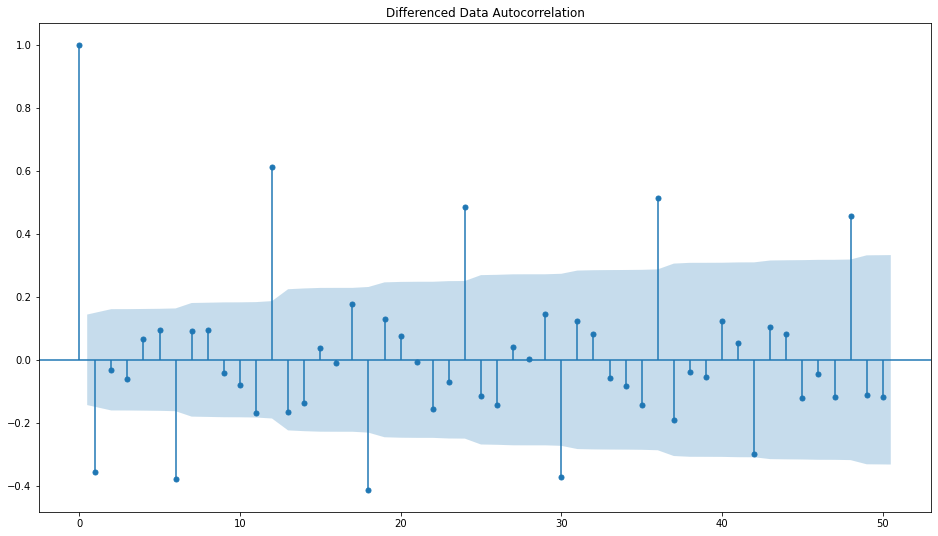

In [138]:
plot_acf(df['Shoe_Sales'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

In [139]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2],6) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (0, 1, 3)(0, 0, 3, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (1, 1, 3)(1, 0, 3, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)
Model: (2, 1, 3)(2, 0, 3, 6)
Model: (3, 1, 0)(3, 0, 0, 6)
Model: (3, 1, 1)(3, 0, 1, 6)
Model: (3, 1, 2)(3, 0, 2, 6)
Model: (3, 1, 3)(3, 0, 3, 6)


In [140]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [142]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Shoe_Sales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:1497.7788474019549
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1426.3361157221493
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1334.5305386143555
SARIMA(0, 1, 0)x(0, 0, 3, 6) - AIC:1272.7823748146584
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:1426.0492095804898
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1385.5711563547777
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1319.6061076038231
SARIMA(0, 1, 0)x(1, 0, 3, 6) - AIC:1254.3273611704712
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1323.6330116787822
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1322.935808409196
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1312.6718076779036
SARIMA(0, 1, 0)x(2, 0, 3, 6) - AIC:1253.134953175335
SARIMA(0, 1, 0)x(3, 0, 0, 6) - AIC:1262.9486596454287
SARIMA(0, 1, 0)x(3, 0, 1, 6) - AIC:1263.357309907479
SARIMA(0, 1, 0)x(3, 0, 2, 6) - AIC:1264.2045276376066
SARIMA(0, 1, 0)x(3, 0, 3, 6) - AIC:1254.8424877283824
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:1476.016777738159
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:1405.2509947832418
SARIMA(0, 1, 1)x(0, 0, 2, 6) - A

SARIMA(2, 1, 1)x(2, 0, 1, 6) - AIC:1291.276197463954
SARIMA(2, 1, 1)x(2, 0, 2, 6) - AIC:1290.4240603013407
SARIMA(2, 1, 1)x(2, 0, 3, 6) - AIC:1230.7082971638147
SARIMA(2, 1, 1)x(3, 0, 0, 6) - AIC:1231.7109521962836
SARIMA(2, 1, 1)x(3, 0, 1, 6) - AIC:1231.2066466735132
SARIMA(2, 1, 1)x(3, 0, 2, 6) - AIC:1231.680082731816
SARIMA(2, 1, 1)x(3, 0, 3, 6) - AIC:1232.705282919852
SARIMA(2, 1, 2)x(0, 0, 0, 6) - AIC:1464.1902793292925
SARIMA(2, 1, 2)x(0, 0, 1, 6) - AIC:1395.8118187732819
SARIMA(2, 1, 2)x(0, 0, 2, 6) - AIC:1304.2162960977194
SARIMA(2, 1, 2)x(0, 0, 3, 6) - AIC:1244.448626268201
SARIMA(2, 1, 2)x(1, 0, 0, 6) - AIC:1394.9227227207796
SARIMA(2, 1, 2)x(1, 0, 1, 6) - AIC:1355.6896079035625
SARIMA(2, 1, 2)x(1, 0, 2, 6) - AIC:1290.66811853563
SARIMA(2, 1, 2)x(1, 0, 3, 6) - AIC:1225.7174336203154
SARIMA(2, 1, 2)x(2, 0, 0, 6) - AIC:1294.3930473271378
SARIMA(2, 1, 2)x(2, 0, 1, 6) - AIC:1291.8412746357321
SARIMA(2, 1, 2)x(2, 0, 2, 6) - AIC:1280.7786642410551
SARIMA(2, 1, 2)x(2, 0, 3, 6) - AIC

In [143]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
59,"(0, 1, 3)","(2, 0, 3, 6)",1208.15
123,"(1, 1, 3)","(2, 0, 3, 6)",1209.79
63,"(0, 1, 3)","(3, 0, 3, 6)",1210.15
55,"(0, 1, 3)","(1, 0, 3, 6)",1211.61
187,"(2, 1, 3)","(2, 0, 3, 6)",1211.76


In [144]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Shoe_Sales'],
                                order=(2, 1, 3),
                                seasonal_order=(2, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

C:\Users\patel\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\patel\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                     
Dep. Variable:                        Shoe_Sales   No. Observations:                  132
Model:             SARIMAX(2, 1, 3)x(2, 0, 3, 6)   Log Likelihood                -594.882
Date:                           Sun, 29 Jan 2023   AIC                           1211.763
Time:                                   21:23:22   BIC                           1241.368
Sample:                               01-31-1980   HQIC                          1223.769
                                    - 12-31-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2009      0.366      0.548      0.583      -0.517       0.919
ar.L2          0.0713      0.460      0.155

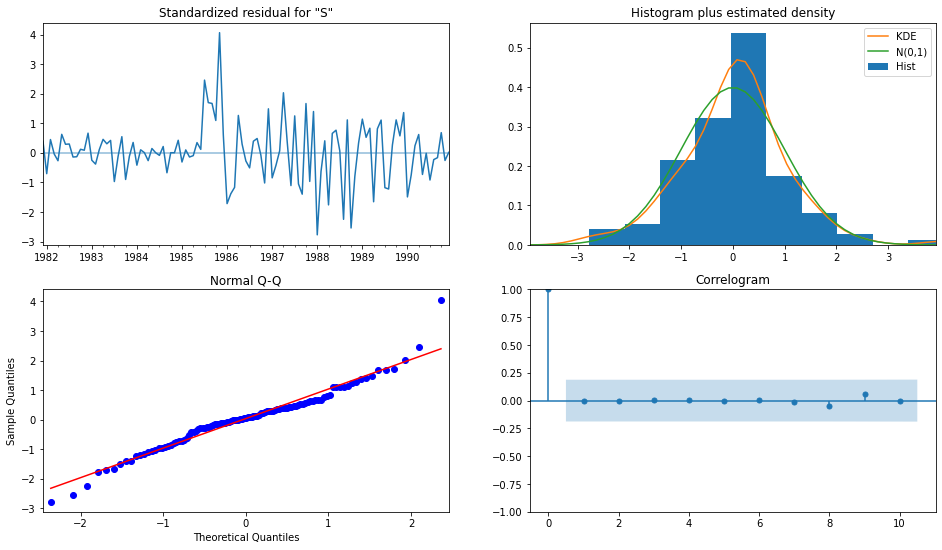

In [145]:
results_auto_SARIMA.plot_diagnostics();

In [146]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [147]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Shoe_Sales,mean,mean_se,mean_ci_lower,mean_ci_upper
1991-01-31,231.78,55.61,122.79,340.77
1991-02-28,224.90,64.56,98.37,351.43
1991-03-31,232.78,74.75,86.27,379.30
1991-04-30,261.54,78.82,107.05,416.02
1991-05-31,220.26,82.05,59.44,381.07


In [149]:
rmse = mean_squared_error(test['Shoe_Sales'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Shoe_Sales'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 60.6525814944996 
MAPE: 23.571376388149943


In [150]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['SARIMA(2,1,3)(2,0,3,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,3)",184.33,85.58
"ARIMA(4,1,2)",142.64,66.18
"SARIMA(2,1,3)(2,0,3,6)",60.65,23.57


In [151]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2],12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [152]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2],12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [153]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [154]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Shoe_Sales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1497.7788474019549
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1338.3663267373174
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1208.4142473347138
SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:6750.212344249594
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1327.397051054789
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1312.5867978686597
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1187.084399500865


C:\Users\patel\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:5686.592677820543
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1201.0600831567197
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1200.754517442123
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1188.0396305010788
SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:3680.510403268242
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:1071.7371393677752
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:1073.5912665500832
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:1074.3858105913987
SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:3740.6068808474497
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1476.016777738159
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1318.386120638769
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1185.4842426144048


C:\Users\patel\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(0, 0, 3, 12) - AIC:78.50526458724586
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1313.5738277003445
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1287.7675669261112
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1164.2974585349866
SARIMA(0, 1, 1)x(1, 0, 3, 12) - AIC:4222.00359665079
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1188.1632556767752
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1188.2091371919075
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1165.8757060508733


C:\Users\patel\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(2, 0, 3, 12) - AIC:3932.3939559598184
SARIMA(0, 1, 1)x(3, 0, 0, 12) - AIC:1063.8535916161477
SARIMA(0, 1, 1)x(3, 0, 1, 12) - AIC:1064.9884940320255
SARIMA(0, 1, 1)x(3, 0, 2, 12) - AIC:1065.4784220760719


C:\Users\patel\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(3, 0, 3, 12) - AIC:2852.1402120920256
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:1463.5451272120854
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1308.3453006660875
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:1177.0247487773695


C:\Users\patel\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(0, 0, 3, 12) - AIC:1086.8069166740572
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1315.5733347402795
SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1279.6069439950572
SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:1156.1654292742865
SARIMA(0, 1, 2)x(1, 0, 3, 12) - AIC:4168.413020484555
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:1190.0663490436043
SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:1190.0436339224016
SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:1157.772313329739


C:\Users\patel\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(2, 0, 3, 12) - AIC:975.8431330879702
SARIMA(0, 1, 2)x(3, 0, 0, 12) - AIC:1065.7996356592412
SARIMA(0, 1, 2)x(3, 0, 1, 12) - AIC:1066.8682500774953
SARIMA(0, 1, 2)x(3, 0, 2, 12) - AIC:1067.2348348823468


C:\Users\patel\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(3, 0, 3, 12) - AIC:3085.742576927477
SARIMA(0, 1, 3)x(0, 0, 0, 12) - AIC:1453.3926745336828
SARIMA(0, 1, 3)x(0, 0, 1, 12) - AIC:1295.6926502825509
SARIMA(0, 1, 3)x(0, 0, 2, 12) - AIC:1165.1974640133078
SARIMA(0, 1, 3)x(0, 0, 3, 12) - AIC:90.33636629100722
SARIMA(0, 1, 3)x(1, 0, 0, 12) - AIC:1312.3375717570534
SARIMA(0, 1, 3)x(1, 0, 1, 12) - AIC:1267.1211111182329
SARIMA(0, 1, 3)x(1, 0, 2, 12) - AIC:1143.6879109002823


C:\Users\patel\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(1, 0, 3, 12) - AIC:4029.472826491493
SARIMA(0, 1, 3)x(2, 0, 0, 12) - AIC:1188.2299003814226
SARIMA(0, 1, 3)x(2, 0, 1, 12) - AIC:1187.6169742262573
SARIMA(0, 1, 3)x(2, 0, 2, 12) - AIC:1145.4715644966354


C:\Users\patel\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(2, 0, 3, 12) - AIC:814.7334298176861
SARIMA(0, 1, 3)x(3, 0, 0, 12) - AIC:1064.814555944163
SARIMA(0, 1, 3)x(3, 0, 1, 12) - AIC:1066.053687047198
SARIMA(0, 1, 3)x(3, 0, 2, 12) - AIC:1066.4459262178045


C:\Users\patel\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(3, 0, 3, 12) - AIC:3097.270034234838
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:1491.1378318825623
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1331.4058144092073
SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:1197.5601940109595


C:\Users\patel\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(0, 0, 3, 12) - AIC:5889.460965407283
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1303.2203127538976
SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1296.8057138710697
SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:1173.386771812892


C:\Users\patel\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(1, 0, 3, 12) - AIC:4221.733642542772
SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:1177.1656900229232
SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:1175.661933810458
SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:1175.0815891381194
SARIMA(1, 1, 0)x(2, 0, 3, 12) - AIC:3723.9720059170972
SARIMA(1, 1, 0)x(3, 0, 0, 12) - AIC:1053.1265950753343
SARIMA(1, 1, 0)x(3, 0, 1, 12) - AIC:1053.9200291588809
SARIMA(1, 1, 0)x(3, 0, 2, 12) - AIC:1053.180529354648
SARIMA(1, 1, 0)x(3, 0, 3, 12) - AIC:3784.2172169745145
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:1471.8669871772454
SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1315.326191247055
SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:1186.003084241199


C:\Users\patel\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(0, 0, 3, 12) - AIC:2089.739366680153
SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1305.1955101698293
SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1288.679501458137
SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:1165.1792553800792


C:\Users\patel\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(1, 0, 3, 12) - AIC:3876.1385205740544
SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:1179.158364986622
SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:1177.6069139947238
SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:1166.9242913617302


C:\Users\patel\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(2, 0, 3, 12) - AIC:16.0
SARIMA(1, 1, 1)x(3, 0, 0, 12) - AIC:1055.1252199394619
SARIMA(1, 1, 1)x(3, 0, 1, 12) - AIC:1055.8125293145708
SARIMA(1, 1, 1)x(3, 0, 2, 12) - AIC:1055.0703093358836
SARIMA(1, 1, 1)x(3, 0, 3, 12) - AIC:3746.1298009730976
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:1463.444554964899
SARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:1306.716335617513
SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:1176.2946254633175


C:\Users\patel\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(0, 0, 3, 12) - AIC:163.69087796251102
SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:1306.1946944647468
SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1280.3994898125318
SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:1157.0825892927596


C:\Users\patel\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(1, 0, 3, 12) - AIC:4013.572691877549
SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:1180.6823652111925
SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:1179.6027990478667
SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:1158.7941776687917


C:\Users\patel\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(2, 0, 3, 12) - AIC:5047.050268943518
SARIMA(1, 1, 2)x(3, 0, 0, 12) - AIC:1056.9262385986335
SARIMA(1, 1, 2)x(3, 0, 1, 12) - AIC:1057.7183717443809
SARIMA(1, 1, 2)x(3, 0, 2, 12) - AIC:1057.013036374823


C:\Users\patel\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(3, 0, 3, 12) - AIC:3586.8820290962262
SARIMA(1, 1, 3)x(0, 0, 0, 12) - AIC:1455.1227996399882
SARIMA(1, 1, 3)x(0, 0, 1, 12) - AIC:1297.9909784306542
SARIMA(1, 1, 3)x(0, 0, 2, 12) - AIC:1167.2864077012532


C:\Users\patel\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(0, 0, 3, 12) - AIC:5823.92214144231
SARIMA(1, 1, 3)x(1, 0, 0, 12) - AIC:1304.0159933121188
SARIMA(1, 1, 3)x(1, 0, 1, 12) - AIC:1268.908140165247
SARIMA(1, 1, 3)x(1, 0, 2, 12) - AIC:1145.2364664319343


C:\Users\patel\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(1, 0, 3, 12) - AIC:4170.242283220667
SARIMA(1, 1, 3)x(2, 0, 0, 12) - AIC:1179.8716548587902
SARIMA(1, 1, 3)x(2, 0, 1, 12) - AIC:1178.3362482908817
SARIMA(1, 1, 3)x(2, 0, 2, 12) - AIC:1147.0079740183228
SARIMA(1, 1, 3)x(2, 0, 3, 12) - AIC:4726.345277330027
SARIMA(1, 1, 3)x(3, 0, 0, 12) - AIC:1056.1814874380966
SARIMA(1, 1, 3)x(3, 0, 1, 12) - AIC:1056.4520957297407
SARIMA(1, 1, 3)x(3, 0, 2, 12) - AIC:1055.8086531987879


C:\Users\patel\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(3, 0, 3, 12) - AIC:3273.9885267473974
SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:1477.9194683056446
SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1331.9353193748689
SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:1199.1019589233915


C:\Users\patel\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(0, 0, 3, 12) - AIC:6055.277421599121
SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:1295.2181640818887
SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1288.684014834561
SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:1175.3764824237173


C:\Users\patel\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(1, 0, 3, 12) - AIC:4289.235254403122
SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:1169.12696766002
SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:1167.3639775018587
SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:1166.919146440966


C:\Users\patel\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(2, 0, 3, 12) - AIC:3932.9106244344184
SARIMA(2, 1, 0)x(3, 0, 0, 12) - AIC:1045.0214623097859
SARIMA(2, 1, 0)x(3, 0, 1, 12) - AIC:1044.8866865004857
SARIMA(2, 1, 0)x(3, 0, 2, 12) - AIC:1044.2189447351332
SARIMA(2, 1, 0)x(3, 0, 3, 12) - AIC:3746.1297997961447
SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:1473.8515321187851
SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1316.7129215405862
SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:1185.5196690090552


C:\Users\patel\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(0, 0, 3, 12) - AIC:525.8357750331334
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1293.3419959529579
SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1289.2967410618662
SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:1166.1030148361656


C:\Users\patel\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:3943.3528786648476
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:1168.6663425966901
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:1168.520870843263
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:1167.6766926782595


C:\Users\patel\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:266.7623471222855
SARIMA(2, 1, 1)x(3, 0, 0, 12) - AIC:1045.5602424877611
SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:1046.717339625854
SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:1046.2045141358617
SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:3748.1298005645067
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:1464.1902793292925
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1308.203801646169
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:1176.4764240716495


C:\Users\patel\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(0, 0, 3, 12) - AIC:87.13702714966905
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1293.3977262812568
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1279.666110429086
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:1158.491000800466


C:\Users\patel\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:4310.475794344207
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:1169.9627314264014
SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:1170.0463664076942
SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:1158.6303263495165


C:\Users\patel\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 0, 3, 12) - AIC:20.0
SARIMA(2, 1, 2)x(3, 0, 0, 12) - AIC:1046.7224205839277
SARIMA(2, 1, 2)x(3, 0, 1, 12) - AIC:1048.0035077290913
SARIMA(2, 1, 2)x(3, 0, 2, 12) - AIC:1047.5868190523872


C:\Users\patel\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(3, 0, 3, 12) - AIC:4028.8649283258906
SARIMA(2, 1, 3)x(0, 0, 0, 12) - AIC:1438.7608782653479
SARIMA(2, 1, 3)x(0, 0, 1, 12) - AIC:1299.4342699382798
SARIMA(2, 1, 3)x(0, 0, 2, 12) - AIC:1169.3674493925228


C:\Users\patel\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(0, 0, 3, 12) - AIC:5962.691134869985
SARIMA(2, 1, 3)x(1, 0, 0, 12) - AIC:1295.6041445473818
SARIMA(2, 1, 3)x(1, 0, 1, 12) - AIC:1270.7701813059605
SARIMA(2, 1, 3)x(1, 0, 2, 12) - AIC:1147.210199004565


C:\Users\patel\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(1, 0, 3, 12) - AIC:4456.966003564863
SARIMA(2, 1, 3)x(2, 0, 0, 12) - AIC:1171.3899151457224
SARIMA(2, 1, 3)x(2, 0, 1, 12) - AIC:1170.3347148393418
SARIMA(2, 1, 3)x(2, 0, 2, 12) - AIC:1148.9865261855539


C:\Users\patel\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(2, 0, 3, 12) - AIC:2439.332856350963
SARIMA(2, 1, 3)x(3, 0, 0, 12) - AIC:1047.9074110156128
SARIMA(2, 1, 3)x(3, 0, 1, 12) - AIC:1048.4590774899134
SARIMA(2, 1, 3)x(3, 0, 2, 12) - AIC:1047.6854746203496


C:\Users\patel\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(3, 0, 3, 12) - AIC:3632.137532359795
SARIMA(3, 1, 0)x(0, 0, 0, 12) - AIC:1467.4747263045615
SARIMA(3, 1, 0)x(0, 0, 1, 12) - AIC:1330.5603607088583
SARIMA(3, 1, 0)x(0, 0, 2, 12) - AIC:1197.9633133926427


C:\Users\patel\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(0, 0, 3, 12) - AIC:6702.355307382297
SARIMA(3, 1, 0)x(1, 0, 0, 12) - AIC:1284.184745558015
SARIMA(3, 1, 0)x(1, 0, 1, 12) - AIC:1280.012799945994
SARIMA(3, 1, 0)x(1, 0, 2, 12) - AIC:1176.7739703103146


C:\Users\patel\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(1, 0, 3, 12) - AIC:5067.090551564767
SARIMA(3, 1, 0)x(2, 0, 0, 12) - AIC:1159.801733879624
SARIMA(3, 1, 0)x(2, 0, 1, 12) - AIC:1159.0479224002206
SARIMA(3, 1, 0)x(2, 0, 2, 12) - AIC:1158.4294432645086


C:\Users\patel\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(2, 0, 3, 12) - AIC:2965.948741706118
SARIMA(3, 1, 0)x(3, 0, 0, 12) - AIC:1036.06732245713
SARIMA(3, 1, 0)x(3, 0, 1, 12) - AIC:1036.545416799499
SARIMA(3, 1, 0)x(3, 0, 2, 12) - AIC:1035.7107027234315
SARIMA(3, 1, 0)x(3, 0, 3, 12) - AIC:3708.042382617568
SARIMA(3, 1, 1)x(0, 0, 0, 12) - AIC:1465.3971811560066
SARIMA(3, 1, 1)x(0, 0, 1, 12) - AIC:1318.5182357844214
SARIMA(3, 1, 1)x(0, 0, 2, 12) - AIC:1189.5749954226349


C:\Users\patel\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(0, 0, 3, 12) - AIC:16.0
SARIMA(3, 1, 1)x(1, 0, 0, 12) - AIC:1283.5864189608253
SARIMA(3, 1, 1)x(1, 0, 1, 12) - AIC:1279.4496953528248
SARIMA(3, 1, 1)x(1, 0, 2, 12) - AIC:1166.4107308820885


C:\Users\patel\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(1, 0, 3, 12) - AIC:4234.336776792354
SARIMA(3, 1, 1)x(2, 0, 0, 12) - AIC:1159.4465234941736
SARIMA(3, 1, 1)x(2, 0, 1, 12) - AIC:1158.487557484143
SARIMA(3, 1, 1)x(2, 0, 2, 12) - AIC:1157.8123209665428
SARIMA(3, 1, 1)x(2, 0, 3, 12) - AIC:3564.0820639367726
SARIMA(3, 1, 1)x(3, 0, 0, 12) - AIC:1035.9071127702464
SARIMA(3, 1, 1)x(3, 0, 1, 12) - AIC:1036.9987556367546
SARIMA(3, 1, 1)x(3, 0, 2, 12) - AIC:1035.9098739798008


C:\Users\patel\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(3, 0, 3, 12) - AIC:3488.957032603614
SARIMA(3, 1, 2)x(0, 0, 0, 12) - AIC:1465.6255973322477
SARIMA(3, 1, 2)x(0, 0, 1, 12) - AIC:1308.8606279044766
SARIMA(3, 1, 2)x(0, 0, 2, 12) - AIC:1177.4468779238832


C:\Users\patel\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(0, 0, 3, 12) - AIC:4958.225604877275
SARIMA(3, 1, 2)x(1, 0, 0, 12) - AIC:1284.5907586456499
SARIMA(3, 1, 2)x(1, 0, 1, 12) - AIC:1281.4454808470152
SARIMA(3, 1, 2)x(1, 0, 2, 12) - AIC:1157.524904092953


C:\Users\patel\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(1, 0, 3, 12) - AIC:3824.241350878685
SARIMA(3, 1, 2)x(2, 0, 0, 12) - AIC:1161.4267100288805
SARIMA(3, 1, 2)x(2, 0, 1, 12) - AIC:1159.89684378293
SARIMA(3, 1, 2)x(2, 0, 2, 12) - AIC:1159.3184759464884


C:\Users\patel\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(2, 0, 3, 12) - AIC:5308.929683378349
SARIMA(3, 1, 2)x(3, 0, 0, 12) - AIC:1037.7828894288664
SARIMA(3, 1, 2)x(3, 0, 1, 12) - AIC:1038.7860576254425
SARIMA(3, 1, 2)x(3, 0, 2, 12) - AIC:1037.6247431013592


C:\Users\patel\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(3, 0, 3, 12) - AIC:5284.094537344044
SARIMA(3, 1, 3)x(0, 0, 0, 12) - AIC:1438.0171500765653
SARIMA(3, 1, 3)x(0, 0, 1, 12) - AIC:1297.0159257140567
SARIMA(3, 1, 3)x(0, 0, 2, 12) - AIC:1168.691408497482


C:\Users\patel\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(0, 0, 3, 12) - AIC:917.0444404749408
SARIMA(3, 1, 3)x(1, 0, 0, 12) - AIC:1286.682649467385
SARIMA(3, 1, 3)x(1, 0, 1, 12) - AIC:1272.7409165499182
SARIMA(3, 1, 3)x(1, 0, 2, 12) - AIC:1149.1427494655043


C:\Users\patel\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(1, 0, 3, 12) - AIC:4394.583165285701
SARIMA(3, 1, 3)x(2, 0, 0, 12) - AIC:1163.2881311261747
SARIMA(3, 1, 3)x(2, 0, 1, 12) - AIC:1161.7217387696433
SARIMA(3, 1, 3)x(2, 0, 2, 12) - AIC:1150.918914319106
SARIMA(3, 1, 3)x(2, 0, 3, 12) - AIC:24.0
SARIMA(3, 1, 3)x(3, 0, 0, 12) - AIC:1039.5994141535248
SARIMA(3, 1, 3)x(3, 0, 1, 12) - AIC:1040.2844262977821
SARIMA(3, 1, 3)x(3, 0, 2, 12) - AIC:1039.219514614892
SARIMA(3, 1, 3)x(3, 0, 3, 12) - AIC:2286.65966248198


C:\Users\patel\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [155]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
211,"(3, 1, 1)","(0, 0, 3, 12)",16.00
91,"(1, 1, 1)","(2, 0, 3, 12)",16.00
171,"(2, 1, 2)","(2, 0, 3, 12)",20.00
251,"(3, 1, 3)","(2, 0, 3, 12)",24.00
19,"(0, 1, 1)","(0, 0, 3, 12)",78.51


In [157]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Shoe_Sales'],
                                order=(3, 1, 1),
                                seasonal_order=(3, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

C:\Users\patel\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\patel\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                        SARIMAX Results                                        
Dep. Variable:                              Shoe_Sales   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 0, [1, 2], 12)   Log Likelihood                -507.955
Date:                                 Sun, 29 Jan 2023   AIC                           1035.910
Time:                                         21:32:30   BIC                           1061.128
Sample:                                     01-31-1980   HQIC                          1046.088
                                          - 12-31-1990                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3379      0.253      1.336      0.182      -0.158       0

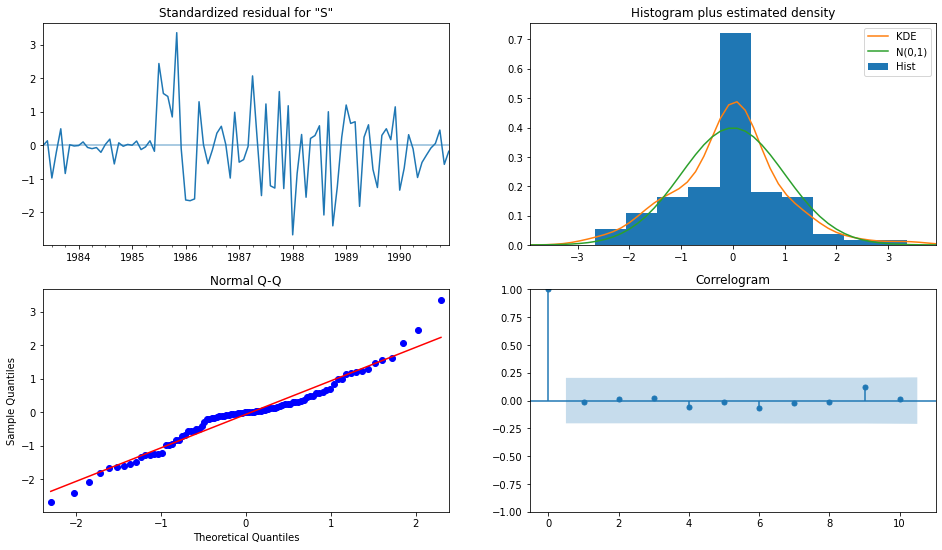

In [158]:
results_auto_SARIMA.plot_diagnostics();

In [159]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [160]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Shoe_Sales,mean,mean_se,mean_ci_lower,mean_ci_upper
1991-01-31,226.70,57.10,114.78,338.62
1991-02-28,204.64,66.56,74.19,335.09
1991-03-31,219.16,77.70,66.87,371.46
1991-04-30,246.82,83.34,83.48,410.16
1991-05-31,230.09,88.86,55.92,404.25


In [161]:
rmse = mean_squared_error(test['Shoe_Sales'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Shoe_Sales'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 90.40429677774382 
MAPE: 36.645258170821364


In [162]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['SARIMA(3,1,1)(3,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,3)",184.33,85.58
"ARIMA(4,1,2)",142.64,66.18
"SARIMA(2,1,3)(2,0,3,6)",60.65,23.57
"SARIMA(3,1,1)(3,0,2,12)",90.40,36.65


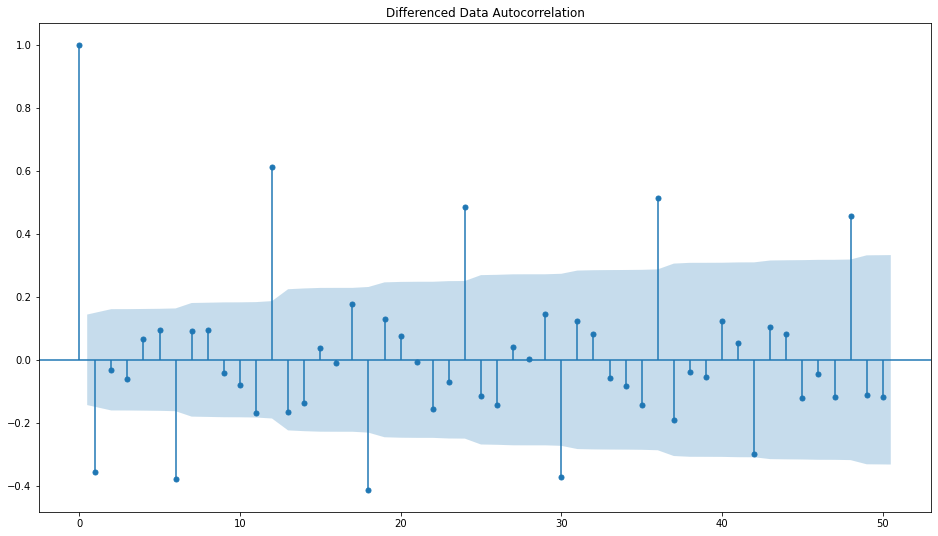

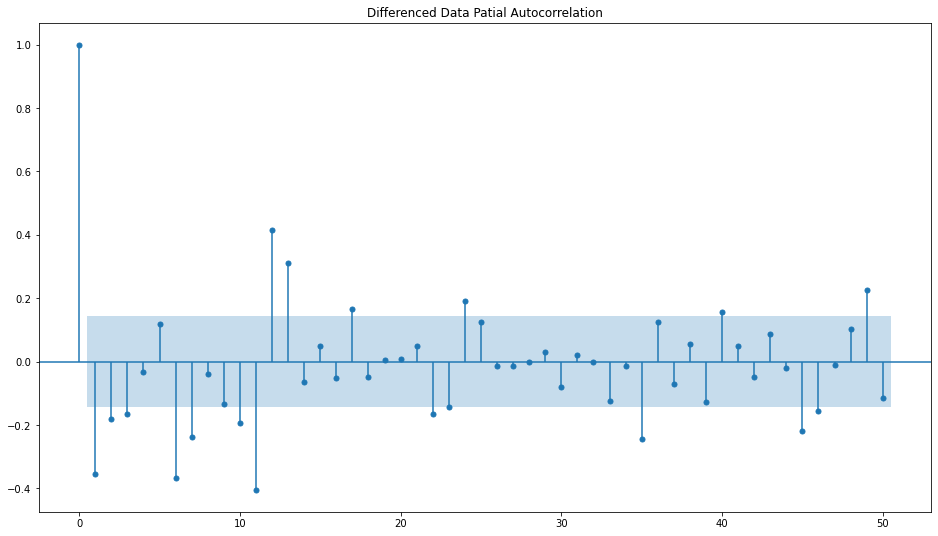

In [164]:
plot_acf(df['Shoe_Sales'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Shoe_Sales'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

In [165]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

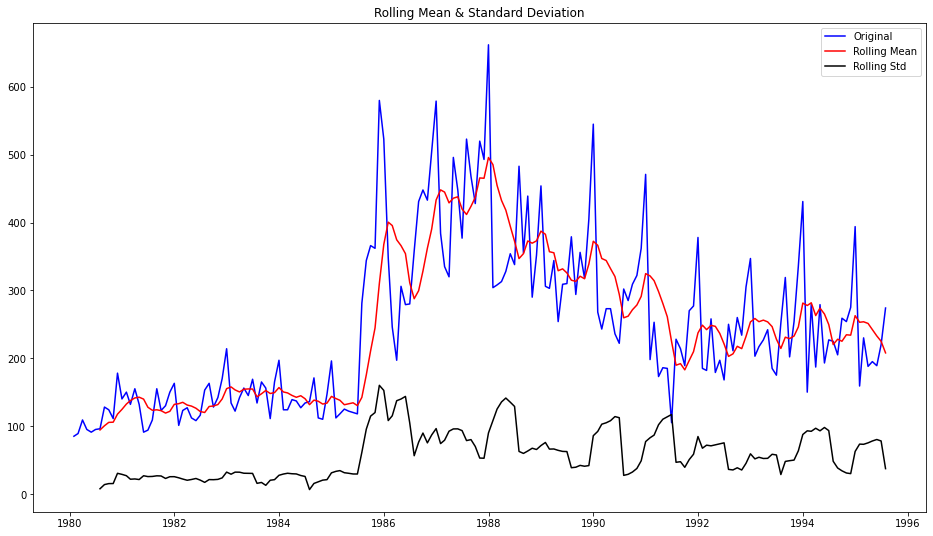

Results of Dickey-Fuller Test:
Test Statistic                 -1.72
p-value                         0.42
#Lags Used                     13.00
Number of Observations Used   173.00
Critical Value (1%)            -3.47
Critical Value (5%)            -2.88
Critical Value (10%)           -2.58
dtype: float64 



In [166]:
test_stationarity(df['Shoe_Sales'])

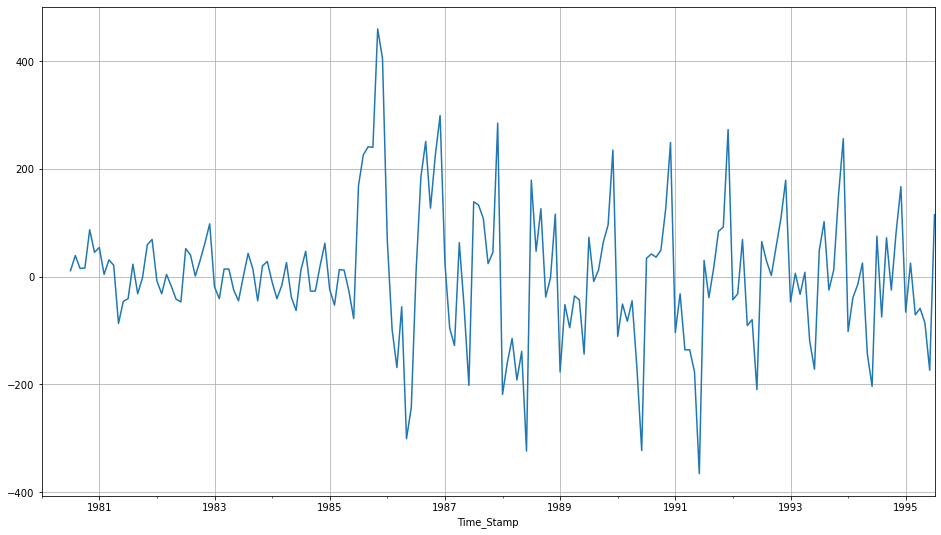

In [168]:
(df['Shoe_Sales'].diff(6)).plot()
plt.grid();

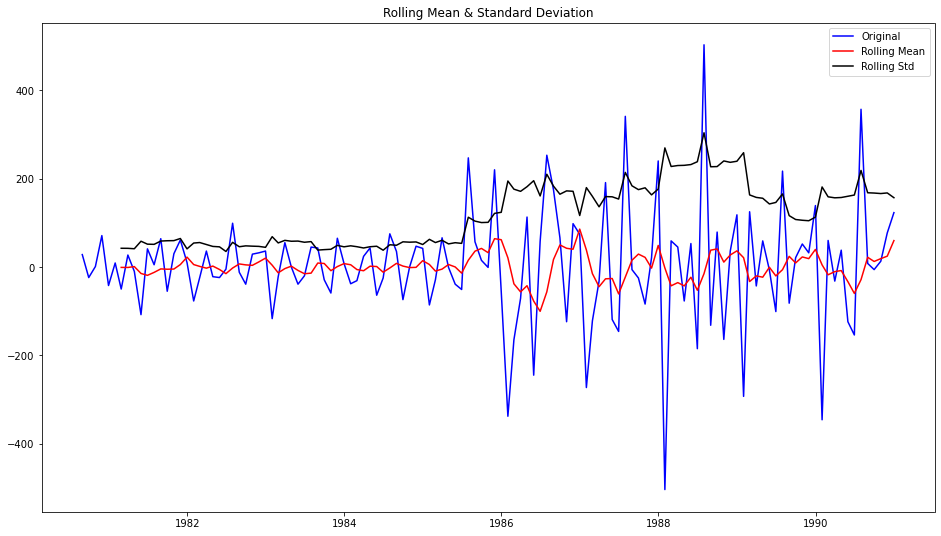

Results of Dickey-Fuller Test:
Test Statistic                -11.33
p-value                         0.00
#Lags Used                      6.00
Number of Observations Used   118.00
Critical Value (1%)            -3.49
Critical Value (5%)            -2.89
Critical Value (10%)           -2.58
dtype: float64 



In [169]:
test_stationarity((train['Shoe_Sales'].diff(6).dropna()).diff(1).dropna())

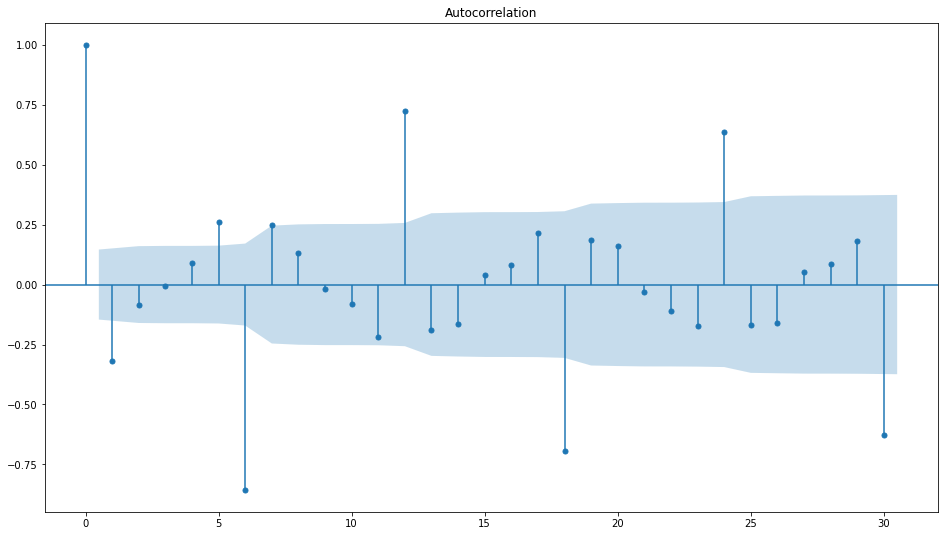

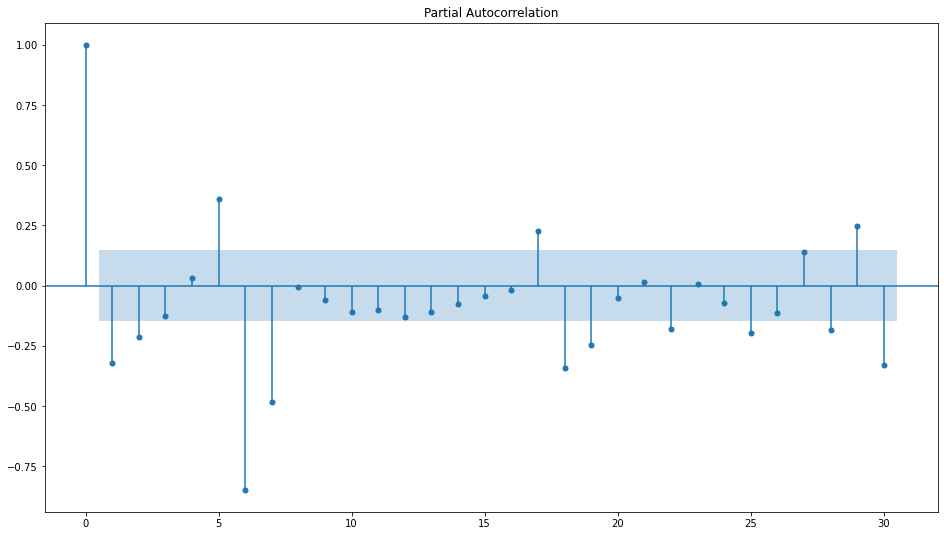

In [171]:
plot_acf((df['Shoe_Sales'].diff(6).dropna()).diff(1).dropna(),lags=30)
plot_pacf((df['Shoe_Sales'].diff(6).dropna()).diff(1).dropna(),lags=30);

In [172]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Shoe_Sales'].values,
                                order=(3, 1, 2),
                                seasonal_order=(2, 1, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                         SARIMAX Results                                         
Dep. Variable:                                         y   No. Observations:                  132
Model:             SARIMAX(3, 1, 2)x(2, 1, [1, 2, 3], 6)   Log Likelihood                -568.835
Date:                                   Sun, 29 Jan 2023   AIC                           1159.670
Time:                                           21:56:00   BIC                           1188.758
Sample:                                                0   HQIC                          1171.454
                                                   - 132                                         
Covariance Type:                                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -2.2375      0.170    -13.165      0.000    

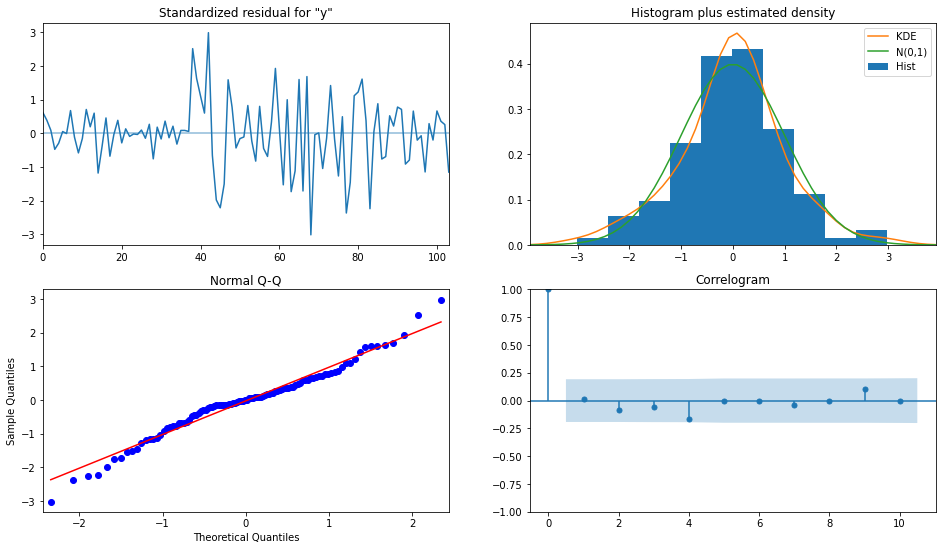

In [173]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

In [174]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [175]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,186.36,53.51,81.47,291.25
1,194.84,66.58,64.34,325.34
2,176.76,78.18,23.53,330.00
3,220.07,89.74,44.19,395.95
4,159.33,97.84,-32.44,351.10


In [176]:
rmse = mean_squared_error(test['Shoe_Sales'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Shoe_Sales'],predicted_manual_SARIMA_6.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 115.65722184709601 
MAPE: 42.54639245350052


In [177]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse],'MAPE':mape}
                           ,index=['SARIMA(3,1,2)(2,1,3,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,3)",184.33,85.58
"ARIMA(4,1,2)",142.64,66.18
"SARIMA(2,1,3)(2,0,3,6)",60.65,23.57
"SARIMA(3,1,1)(3,0,2,12)",90.40,36.65
"SARIMA(3,1,2)(2,1,3,6)",115.66,42.55


In [179]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Shoe_Sales'],
                                order=(2,1,3),
                                seasonal_order=(2, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\Users\patel\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\patel\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                     
Dep. Variable:                        Shoe_Sales   No. Observations:                  187
Model:             SARIMAX(2, 1, 3)x(2, 0, 3, 6)   Log Likelihood                -886.453
Date:                           Sun, 29 Jan 2023   AIC                           1794.907
Time:                                   21:58:05   BIC                           1829.005
Sample:                               01-31-1980   HQIC                          1808.749
                                    - 07-31-1995                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2268      0.412      0.551      0.582      -0.580       1.034
ar.L2         -0.0198      0.550     -0.036

In [180]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [181]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

Shoe_Sales,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-31,244.24,52.33,141.67,346.81
1995-09-30,256.96,58.33,142.63,371.28
1995-10-31,253.16,67.06,121.72,384.61
1995-11-30,311.75,71.72,171.19,452.31
1995-12-31,391.39,75.48,243.46,539.32


In [183]:
rmse = mean_squared_error(df['Shoe_Sales'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 51.07108354401243


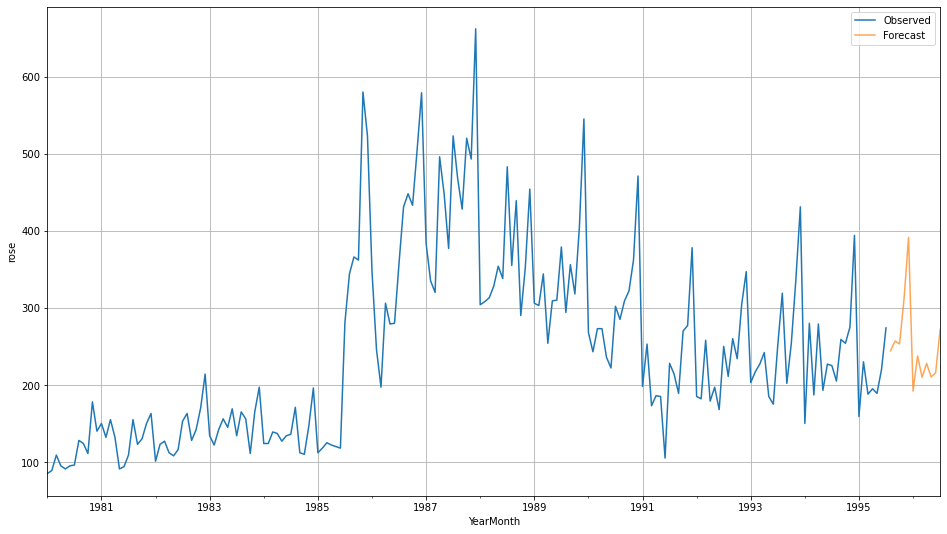

In [185]:
axis = df['Shoe_Sales'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('YearMonth')
axis.set_ylabel('rose')
plt.legend(loc='best')
plt.grid();

In [186]:
resultsDf

,RMSE,MAPE
"ARIMA(2,1,3)",184.33,85.58
"ARIMA(4,1,2)",142.64,66.18
"SARIMA(2,1,3)(2,0,3,6)",60.65,23.57
"SARIMA(3,1,1)(3,0,2,12)",90.40,36.65
"SARIMA(3,1,2)(2,1,3,6)",115.66,42.55


# End